<a href="https://colab.research.google.com/github/vani361/satellite_images_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#mount drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/satellite_images_project/train.csv')

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/satellite_images_project/test.csv')

#EDA

In [ ]:
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [ ]:
df.isnull().count()
#we see there are no missing values

id               16209
date             16209
price            16209
bedrooms         16209
bathrooms        16209
sqft_living      16209
sqft_lot         16209
floors           16209
waterfront       16209
view             16209
condition        16209
grade            16209
sqft_above       16209
sqft_basement    16209
yr_built         16209
yr_renovated     16209
zipcode          16209
lat              16209
long             16209
sqft_living15    16209
sqft_lot15       16209
dtype: int64

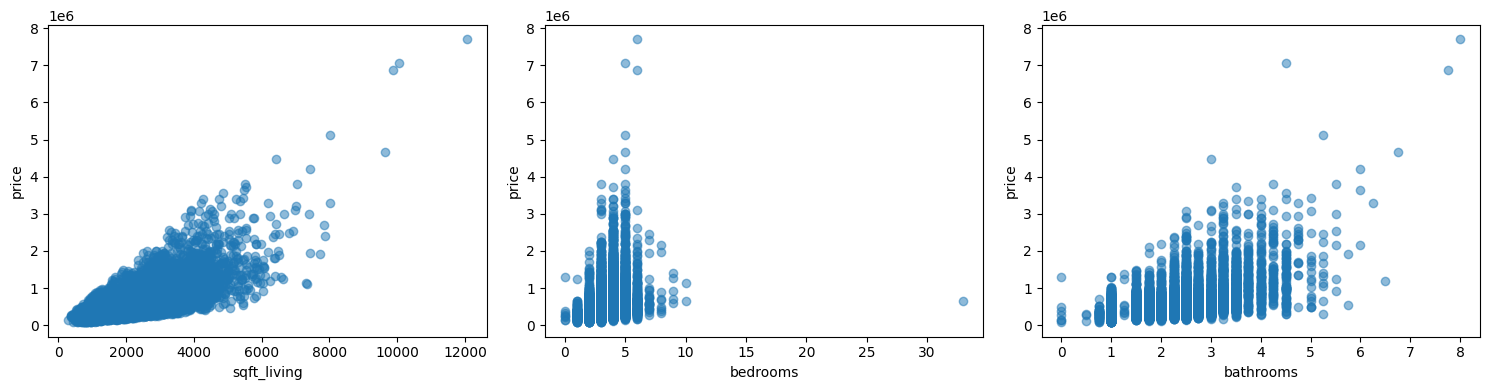

In [ ]:
#seeing different behavior of price with different features
features = ["sqft_living", "bedrooms", "bathrooms"]

plt.figure(figsize=(15,4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.scatter(df[feature], df["price"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("price")

plt.tight_layout()
plt.show()


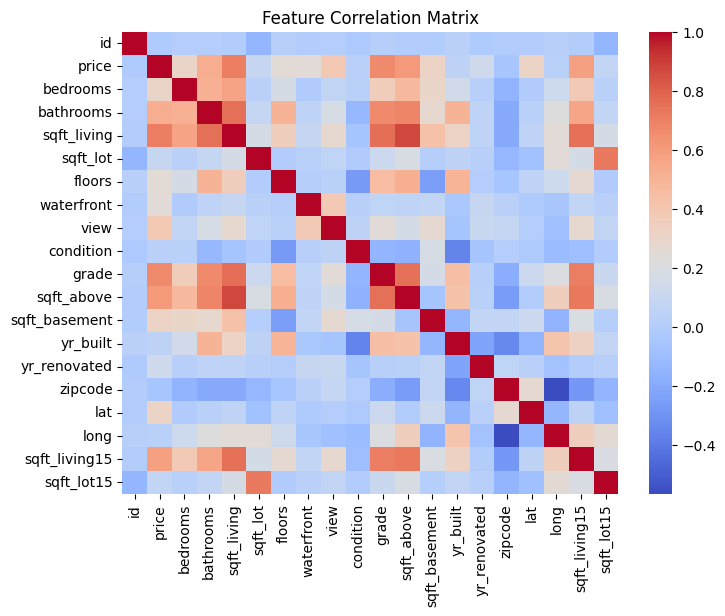

In [ ]:
df.drop('date',axis=1,inplace=True)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


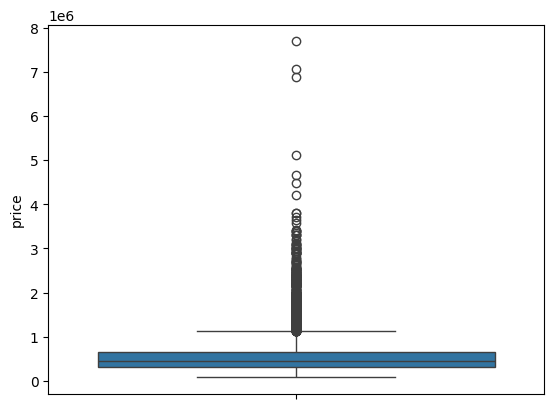

In [ ]:
sns.boxplot(df["price"])
plt.show()


#Geopandas for EDA

In [ ]:
pip install contextily

In [ ]:
pip install geopandas

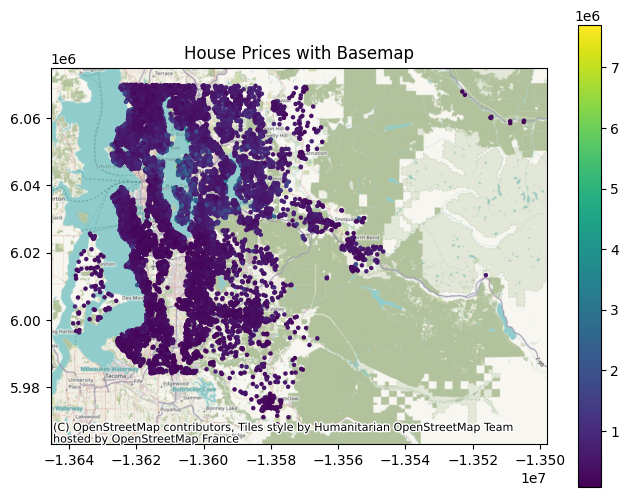

In [ ]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt


gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.long, df.lat),
    crs="EPSG:4326"  # WGS84 (lat/lon)
)


# Convert to Web Mercator for basemap
gdf_web = gdf.to_crs(epsg=3857)

ax = gdf_web.plot(
    column="price",
    cmap="viridis",
    legend=True,
    figsize=(8,6),
    markersize=5
)

ctx.add_basemap(ax)
plt.title("House Prices with Basemap")
plt.show()
#gdf.explore()


In [ ]:
#we see its a map of seattle

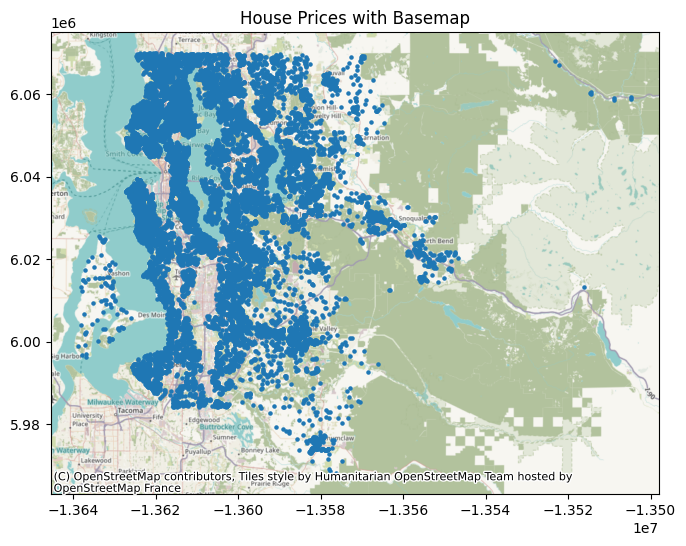

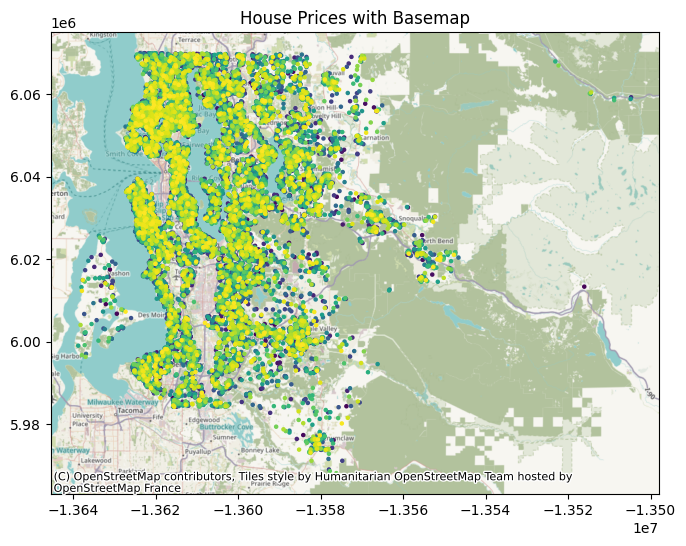

In [ ]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt


gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.long, df.lat),
    crs="EPSG:4326"  # WGS84 (lat/lon)
)


# Convert to Web Mercator for basemap
gdf_web = gdf.to_crs(epsg=3857)

ax = gdf_web.plot(
    legend=True,
    figsize=(8,6),
    markersize=5
)

ctx.add_basemap(ax)
plt.title("House Prices with Basemap")
plt.show()
#gdf.explore()


gdf_test = gpd.GeoDataFrame(
    df_test,
    geometry=gpd.points_from_xy(df_test.long, df_test.lat),
    crs="EPSG:4326"  # WGS84 (lat/lon)
)


# Convert to Web Mercator for basemap
gdf_web = gdf.to_crs(epsg=3857)

ax = gdf_web.plot(

    cmap="viridis",
    legend=True,
    figsize=(8,6),
    markersize=5
)

ctx.add_basemap(ax)
plt.title("House Prices with Basemap")
plt.show()
#gdf.explore()


In [ ]:
gdf=gdf.to_crs(epsg=32633)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             16209 non-null  int64   
 1   date           16209 non-null  object  
 2   price          16209 non-null  int64   
 3   bedrooms       16209 non-null  int64   
 4   bathrooms      16209 non-null  float64 
 5   sqft_living    16209 non-null  int64   
 6   sqft_lot       16209 non-null  int64   
 7   floors         16209 non-null  float64 
 8   waterfront     16209 non-null  int64   
 9   view           16209 non-null  int64   
 10  condition      16209 non-null  int64   
 11  grade          16209 non-null  int64   
 12  sqft_above     16209 non-null  int64   
 13  sqft_basement  16209 non-null  int64   
 14  yr_built       16209 non-null  int64   
 15  yr_renovated   16209 non-null  int64   
 16  zipcode        16209 non-null  int64   
 17  lat            16209 no

In [ ]:
from shapely.geometry import Point
import numpy as np
#adding features

# Calculate centroid of all houses
city_center = gdf.geometry.union_all().centroid

# Distance from each house to centroid
gdf["dist_to_center"] = gdf.geometry.distance(city_center)
# Average price of nearby houses (within 1 km)
gdf["price_density_1km"] = gdf.geometry.apply(
    lambda x: gdf[gdf.geometry.distance(x) < 1000]["price"].mean()
)

# Count of houses within 500m
gdf["houses_500m"] = gdf.geometry.apply(
    lambda x: gdf[gdf.geometry.distance(x) < 500].shape[0]
)

#having correlated features
gdf['avg_living_nearby'] = gdf.geometry.apply(lambda x:
    np.average(gdf['sqft_living'], weights=1/(gdf.geometry.distance(x)+1e-5))
)
gdf['age_center_interaction'] = (2025-gdf['yr_built']) * gdf['dist_to_center']
gdf['living_distance_interaction'] = gdf['sqft_living'] * gdf['dist_to_center']



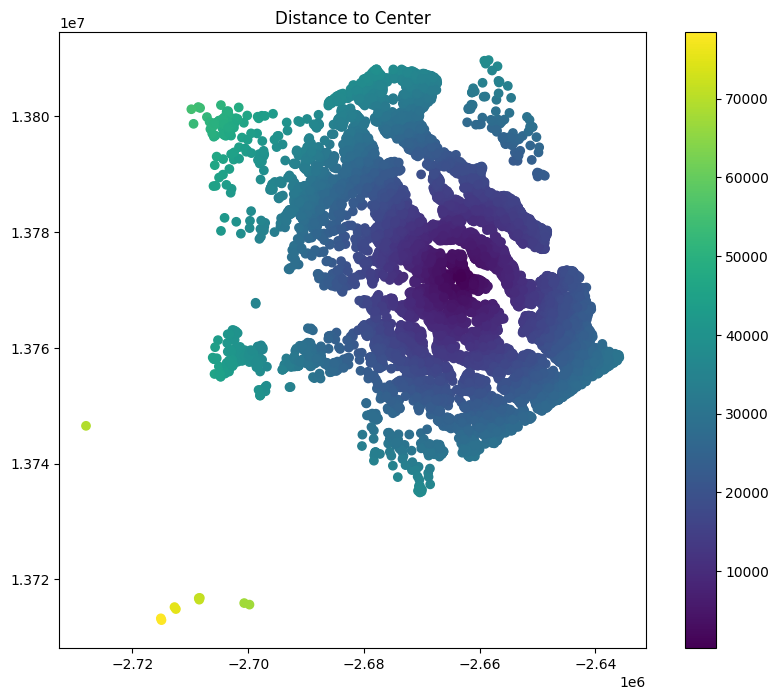

In [ ]:
# color by distance to center
gdf.plot(column="dist_to_center", cmap="viridis", legend=True, figsize=(10, 8))
plt.title("Distance to Center")
plt.show()


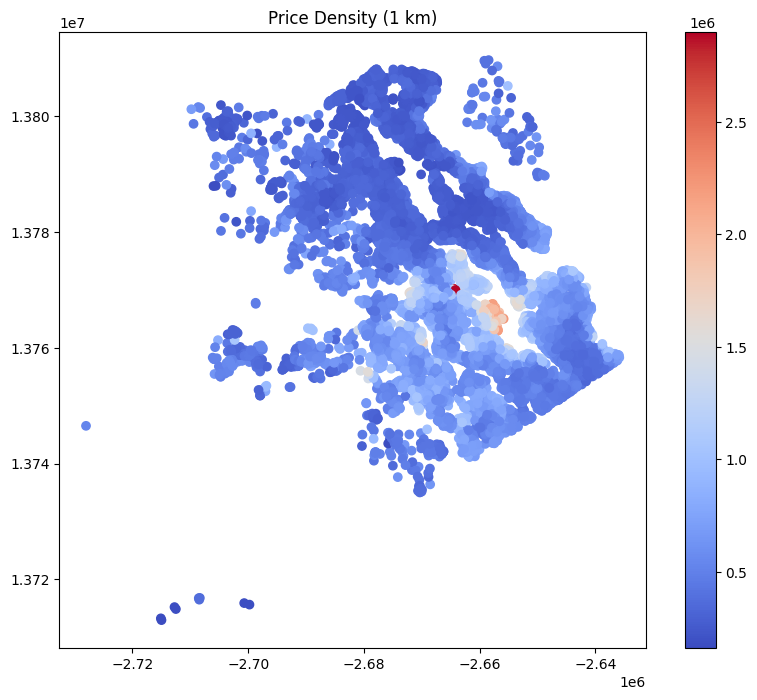

In [ ]:
# Scatter plot colored by price_density_1km
gdf.plot(column="price_density_1km", cmap="coolwarm", legend=True, figsize=(10,8))
plt.title("Price Density (1 km)")
plt.show()


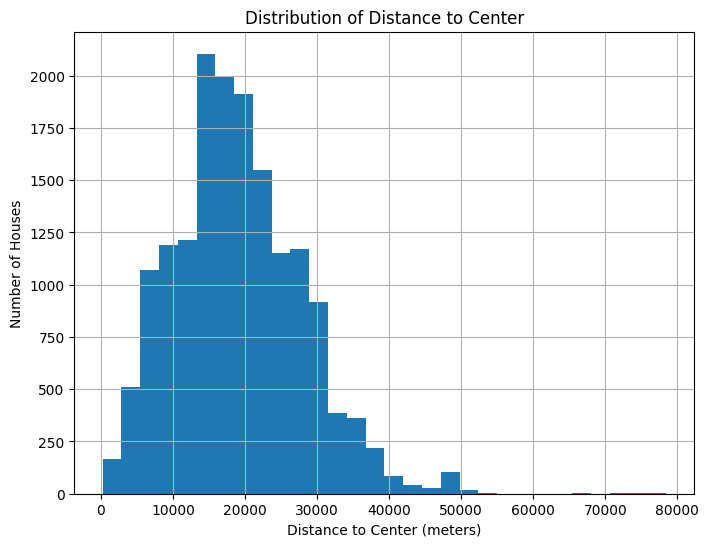

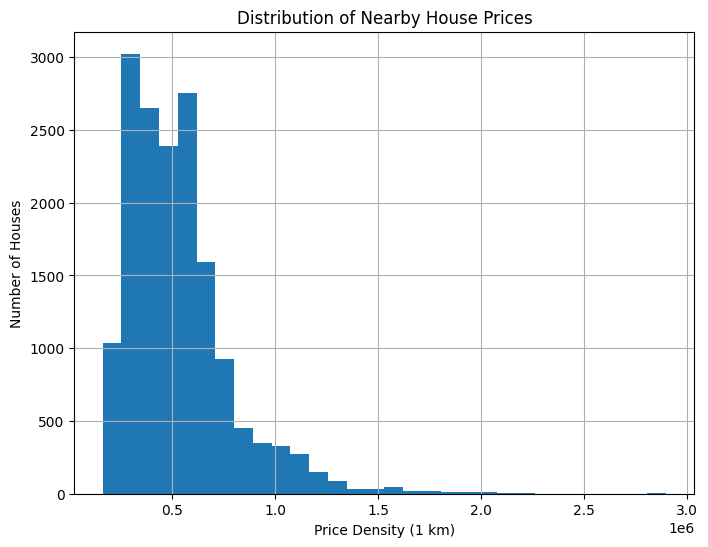

In [ ]:
gdf["dist_to_center"].hist(bins=30, figsize=(8,6))
plt.xlabel("Distance to Center (meters)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Distance to Center")
plt.show()

gdf["price_density_1km"].hist(bins=30, figsize=(8,6))
plt.xlabel("Price Density (1 km)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Nearby House Prices")
plt.show()


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

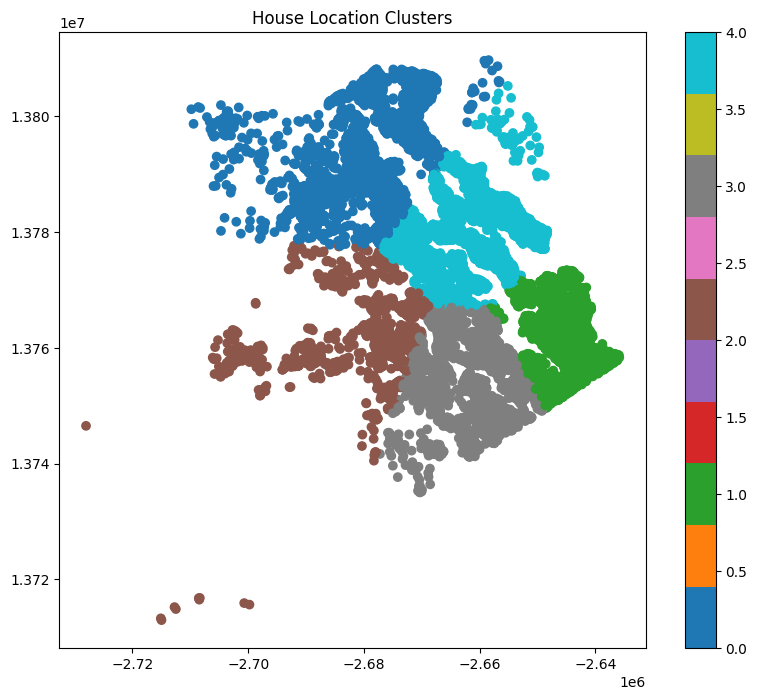

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Convert geometry to coordinates
coords = np.array(list(gdf.geometry.apply(lambda x: (x.x, x.y))))

# Create 5 spatial clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(coords)
gdf["location_cluster"] = kmeans.labels_
gdf.plot(column="location_cluster", cmap="tab10", legend=True, figsize=(10, 8))
plt.title("House Location Clusters")
plt.show()



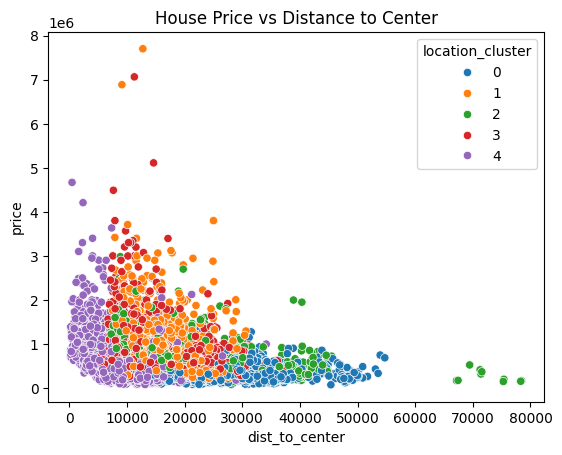

In [ ]:
import seaborn as sns

# Price vs. distance to center
sns.scatterplot(data=gdf, x="dist_to_center", y="price", hue="location_cluster", palette="tab10")
plt.title("House Price vs Distance to Center")
plt.show()


In [ ]:
gdf=gdf.drop(columns=['price_density_1km'])
#drop this as this will leak info if used in models
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

In [ ]:
#test data
gdf_test=gdf_test.to_crs(epsg=32633)
df_test=gdf_test

# cache training geometry and columns for speed
train_geom = gdf.geometry
train_sqft = gdf["sqft_living"]


df_test["dist_to_center"] = df_test.geometry.distance(city_center)
df_test["houses_500m"] = df_test.geometry.apply(
    lambda x: (train_geom.distance(x) < 500).sum()
)
df_test["avg_living_nearby"] = df_test.geometry.apply(
    lambda x: np.average(
        train_sqft,
        weights=1 / (train_geom.distance(x) + 1e-5)
    )
)

df_test['age_center_interaction'] = (2025 - df_test['yr_built']) * df_test['dist_to_center']

df_test['living_distance_interaction'] = (
    df_test['sqft_living'] * df_test['dist_to_center']
)

# Extract coordinates from test data
test_coords = np.column_stack([df_test.geometry.x, df_test.geometry.y])

# Predict cluster labels using trained model
df_test["location_cluster"] = kmeans.predict(test_coords)



# Using XG boost for tabular features only

In [ ]:
pip install xgboost scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#preparing data
from xgboost import XGBRegressor
X = df.drop(columns=["id","price",'date'])
y = df["price"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#train
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log price): {rmse:.4f}")
print(f"R² score: {r2:.4f}")


RMSE (log price): 115244.7024
R² score: 0.8942


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "max_depth": [3, 4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [300, 500, 800],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

search = RandomizedSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    param_grid,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log price): {rmse:.4f}")
print(f"R² score: {r2:.4f}")


RMSE (log price): 119942.3349
R² score: 0.8854


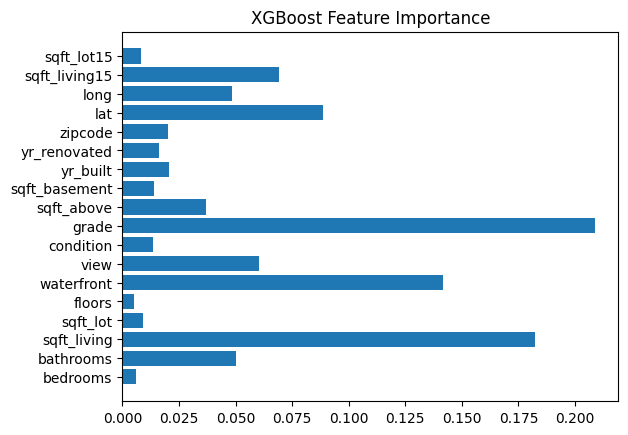

In [ ]:
import matplotlib.pyplot as plt

best_model.feature_importances_

plt.figure()
plt.barh(X.columns, best_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()


we see a score around 0.89 using xg boost and only original features

#Using random forest and original features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
#test
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log price): {rmse:.4f}")
print(f"R² score: {r2:.4f}")


RMSE (log price): 129959.4813
R² score: 0.8654


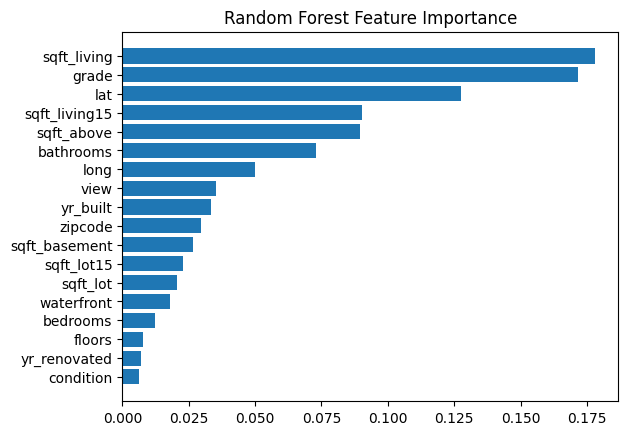

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.barh(X.columns[indices], importances[indices])
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1
)

search.fit(X_train, y_train)
best_rf = search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log price): {rmse:.4f}")
print(f"R² score: {r2:.4f}")

RMSE (log price): 130313.1088
R² score: 0.8647


we see xg boost performs better than random forest

# Using Neural Networks

In [ ]:
#preprocessing data for neural networks
X=(X.values)
y=np.log(y.values)
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
class HouseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
train_loader = DataLoader(
    HouseDataset(X_train, y_train),
    batch_size=32,
    shuffle=True
)

test_loader = DataLoader(
    HouseDataset(X_test, y_test),
    batch_size=32,
    shuffle=False
)


In [ ]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )
        for m in self.model:
          if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            nn.init.zeros_(m.bias)

    def forward(self, x):
      return self.model(x)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = MLPRegressor(input_dim=X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100

In [ ]:
lrs = []
losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()


        lrs.append(optimizer.param_groups[0]["lr"])
        losses.append(loss.item())


        train_loss += loss.item()

    train_loss /= len(train_loader)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train MSE: {train_loss:.4f}")


Epoch 10/100 | Train MSE: 1.3680
Epoch 20/100 | Train MSE: 0.9991
Epoch 30/100 | Train MSE: 0.7936
Epoch 40/100 | Train MSE: 0.6010
Epoch 50/100 | Train MSE: 0.4754
Epoch 60/100 | Train MSE: 0.3461
Epoch 70/100 | Train MSE: 0.2628
Epoch 80/100 | Train MSE: 0.1904
Epoch 90/100 | Train MSE: 0.1431
Epoch 100/100 | Train MSE: 0.1059


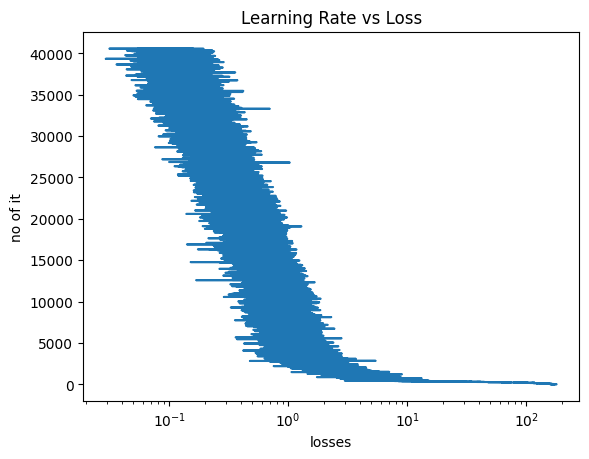

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(losses, np.arange(0,len(losses),1))
plt.xscale("log")
plt.xlabel("losses")
plt.ylabel("no of it")
plt.title("Learning Rate vs Loss")
plt.show()


In [ ]:
model.eval()
preds, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_pred = model(X_batch).cpu().numpy()

        preds.extend(y_pred)
        actuals.extend(y_batch.numpy())
preds = np.array(preds).flatten()
actuals = np.array(actuals).flatten()

rmse = np.sqrt(mean_squared_error(actuals, preds))
r2 = r2_score(actuals, preds)

print(f"RMSE (log price): {rmse:.4f}")
print(f"R² score: {r2:.4f}")
rmse_real = np.sqrt(
    mean_squared_error(np.expm1(actuals), np.expm1(preds))
)
print(f"RMSE (actual price): {rmse_real:,.0f}")


RMSE (log price): 0.1785
R² score: 0.8846
RMSE (actual price): 138,414


In [ ]:
#best performance by xg boost so we use that

#Using Geopandas Features in XG boost


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

In [ ]:
# List of numeric features to check for outliers
numeric_features = [
     'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'dist_to_center', 'houses_500m'
]

def fit_outlier_caps(df, features, lower_percentile=0.01, upper_percentile=0.99):
    caps = {}
    for col in features:
        caps[col] = {
            "lower": df[col].quantile(lower_percentile),
            "upper": df[col].quantile(upper_percentile)
        }
        print(f"{col}: fitted caps {caps[col]['lower']:.2f} - {caps[col]['upper']:.2f}")
    return caps

# Apply capping

def apply_outlier_caps(df, caps):
    df_capped = df.copy()
    for col, bounds in caps.items():
        df_capped[col] = np.clip(
            df_capped[col],
            bounds["lower"],
            bounds["upper"]
        )
    return df_capped
# Training data
# Learn caps from training data
outlier_caps = fit_outlier_caps(gdf, numeric_features)
gdf_clean = apply_outlier_caps(gdf, outlier_caps)

# Test data
df_test = apply_outlier_caps(df_test, outlier_caps)

gdf_clean[numeric_features].describe(percentiles=[0.01,0.25,0.5,0.75,0.99])


sqft_living: fitted caps 720.00 - 4920.00
sqft_lot: fitted caps 1005.00 - 213008.00
sqft_above: fitted caps 700.00 - 4380.00
sqft_basement: fitted caps 0.00 - 1650.00
sqft_living15: fitted caps 950.00 - 4049.36
sqft_lot15: fitted caps 1188.08 - 169436.36
dist_to_center: fitted caps 2809.31 - 44368.44
houses_500m: fitted caps 1.00 - 43.00


sqft_living       sqft_lot    sqft_above  sqft_basement  \
count  16209.000000   16209.000000  16209.000000   16209.000000   
mean    2065.041397   13900.058239   1778.867543     285.348078   
std      866.149896   27651.334295    791.818599     425.647126   
min      720.000000    1005.000000    700.000000       0.000000   
1%       720.000000    1005.000000    700.000000       0.000000   
25%     1430.000000    5004.000000   1200.000000       0.000000   
50%     1910.000000    7599.000000   1560.000000       0.000000   
75%     2550.000000   10631.000000   2200.000000     560.000000   
99%     4920.000000  213008.000000   4380.000000    1650.000000   
max     4920.000000  213008.000000   4380.000000    1650.000000   

       sqft_living15     sqft_lot15  dist_to_center   houses_500m  
count   16209.000000   16209.000000    16209.000000  16209.000000  
mean     1979.510314   12106.976292    18988.189474     14.383182  
std       663.162801   20905.373585     8621.463800      8.932590  
min       950.000000    1188.080000     2809.308839      1.000000  
1%        950.000000    1188.153600     2810.400925      1.000000  
25%      1480.000000    5098.000000    13080.024515      8.000000  
50%      1840.000000    7620.000000    18298.732375     13.000000  
75%      2360.000000   10053.000000    24614.599448     19.000000  
99%      4048.771200  169332.731200    44366.287313     43.000000  
max      4049.360000  169436.360000    44368.440023     43.000000

In [ ]:
gdf=gdf_clean
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

In [ ]:
#feature engineering
gdf['grade_cluster']=gdf["grade"]*gdf["location_cluster"]
gdf['living_grade'] = gdf['sqft_living'] * gdf['grade']

import pandas as pd
import numpy as np

# Assume current year is 2025
CURRENT_YEAR = 2025

# House Features
gdf['bed_bath_ratio'] = gdf['bedrooms'] / gdf['bathrooms'].replace(0, 1)
gdf['basement_ratio'] = gdf['sqft_basement'] / gdf['sqft_living'].replace(0, 1)

gdf['age'] = CURRENT_YEAR - gdf['yr_built']
gdf['renovated_age'] = np.where(gdf['yr_renovated'] > 0, CURRENT_YEAR - gdf['yr_renovated'], 0)
gdf['age_since_renovation'] = np.where(gdf['yr_renovated'] > 0, CURRENT_YEAR - gdf['yr_renovated'], gdf['age'])

gdf['floors_squared'] = gdf['floors'] ** 2

# Interaction Features
gdf['living_distance_ratio'] = gdf['sqft_living'] / gdf['dist_to_center'].replace(0, 1)
gdf['age_center_ratio'] = gdf['age'] / gdf['dist_to_center'].replace(0, 1)
gdf['grade_distance_interaction'] = gdf['grade'] / gdf['dist_to_center'].replace(0, 1)

# Geospatial Features
center_lat, center_long = gdf['lat'].mean(), gdf['long'].mean()
gdf['lat_long_product'] = gdf['lat'] * gdf['long']
gdf['lat_long_diff_from_center'] = np.sqrt((gdf['lat'] - center_lat)**2 + (gdf['long'] - center_long)**2)

# One-hot encode location_cluster
cluster_dummies = pd.get_dummies(
    gdf['location_cluster'],
    prefix='cluster',
    drop_first=False   # keep all clusters
)

# Add to dataframe
gdf = pd.concat([gdf, cluster_dummies], axis=1)

#  drop original column
gdf.drop(columns=['location_cluster'], inplace=True)

print("New features added:", gdf.columns.tolist())


New features added: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry', 'dist_to_center', 'houses_500m', 'avg_living_nearby', 'age_center_interaction', 'living_distance_interaction', 'grade_cluster', 'living_grade', 'bed_bath_ratio', 'basement_ratio', 'age', 'renovated_age', 'age_since_renovation', 'floors_squared', 'living_distance_ratio', 'age_center_ratio', 'grade_distance_interaction', 'lat_long_product', 'lat_long_diff_from_center', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

In [ ]:
# Create grid cells (tune cell size!)
cell_size = 0.02  # degrees (~2km, depends on latitude)

x0 = gdf.geometry.x.min()
y0 = gdf.geometry.y.min()

gdf["grid_x"] = ((gdf.geometry.x - x0) // cell_size).astype(int)
gdf["grid_y"] = ((gdf.geometry.y - y0) // cell_size).astype(int)


# Unique grid cells
unique_cells = gdf[["grid_x", "grid_y"]].drop_duplicates()

# Shuffle grid cells
np.random.seed(42)
shuffled_cells = unique_cells.sample(frac=1)

# Split cells
split_ratio = 0.8
n_train = int(len(shuffled_cells) * split_ratio)

train_cells = shuffled_cells.iloc[:n_train]
test_cells  = shuffled_cells.iloc[n_train:]

# Assign rows based on grid membership
train_gdf = gdf.merge(train_cells, on=["grid_x", "grid_y"])
test_gdf  = gdf.merge(test_cells,  on=["grid_x", "grid_y"])

print(len(train_gdf), len(test_gdf))


12962 3247


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

In [ ]:
train_gdf.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  7212660540  20150115T000000  200000         4       2.50         1720   
2  8562780200  20150427T000000  352499         2       2.25         1240   
3  3432500486  20140623T000000  299995         2       1.00         1060   
4  1126059095  20140526T000000  880000         3       2.00         2130   

   sqft_lot  floors  waterfront  view  ...  grade_distance_interaction  \
0      9240     2.0           0     0  ...                    0.000448   
1      8638     2.0           0     0  ...                    0.000215   
2      1005     2.0           0     0  ...                    0.000565   
3      7200     1.0           0     0  ...                    0.000242   
4     35169     1.0           0     0  ...                    0.000322   

   lat_long_product  lat_long_diff_from_center  cluster_0  cluster_1  \
0      -5796.086969                   0.127401       True      False   
1      -5781.784435                   0.306722       True      False   
2      -5802.386043                   0.143876      False      False   
3      -5840.088684                   0.211294      False       True   
4      -5831.238915                   0.209042      False      False   

   cluster_2  cluster_3  cluster_4   grid_x   grid_y  
0      False      False      False  2698891  3535055  
1      False      False      False  2558153  4694420  
2       True      False      False  2638961  2766610  
3      False      False      False  4239242  2239642  
4      False       True      False  3581160  1768821  

[5 rows x 47 columns]

In [ ]:
X_train = train_gdf.drop(columns=["price", "geometry","grid_x","grid_y", "id",'date'])
X_test  = test_gdf.drop(columns=["price", "geometry","grid_x","grid_y", "id",'date'])

X_train = pd.get_dummies(X_train, columns=["zipcode"], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=["zipcode"], drop_first=True)


y_train = np.log1p(train_gdf["price"])
y_test  = np.log1p(test_gdf["price"])



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [ ]:
# Predict
y_pred_log = rf_model.predict(X_test)

# Convert back to original price scale
y_pred = np.expm1(y_pred_log)
y_test=np.expm1(y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log price): {rmse:.4f}")
print(f"R² score: {r2:.4f}")


RMSE (log price): 112695.2073
R² score: 0.8796


In [ ]:
X_train = train_gdf.drop(columns=["price", "geometry","grid_x","grid_y", "id",'date'])
X_test  = test_gdf.drop(columns=["price", "geometry","grid_x","grid_y", "id",'date'])

X_train = pd.get_dummies(X_train, columns=["zipcode"], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=["zipcode"], drop_first=True)


y_train = np.log1p(train_gdf["price"])
y_test  = np.log1p(test_gdf["price"])



In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-rmse:0.49386
[1]	validation_0-rmse:0.47452
[2]	validation_0-rmse:0.45645
[3]	validation_0-rmse:0.43909
[4]	validation_0-rmse:0.42267
[5]	validation_0-rmse:0.40773
[6]	validation_0-rmse:0.39350
[7]	validation_0-rmse:0.37992
[8]	validation_0-rmse:0.36704
[9]	validation_0-rmse:0.35494
[10]	validation_0-rmse:0.34375
[11]	validation_0-rmse:0.33283
[12]	validation_0-rmse:0.32284
[13]	validation_0-rmse:0.31294
[14]	validation_0-rmse:0.30398
[15]	validation_0-rmse:0.29518
[16]	validation_0-rmse:0.28707
[17]	validation_0-rmse:0.27949
[18]	validation_0-rmse:0.27248
[19]	validation_0-rmse:0.26597
[20]	validation_0-rmse:0.25992
[21]	validation_0-rmse:0.25395
[22]	validation_0-rmse:0.24815
[23]	validation_0-rmse:0.24298
[24]	validation_0-rmse:0.23802
[25]	validation_0-rmse:0.23337
[26]	validation_0-rmse:0.22915
[27]	validation_0-rmse:0.22502
[28]	validation_0-rmse:0.22137
[29]	validation_0-rmse:0.21783
[30]	validation_0-rmse:0.21466
[31]	validation_0-rmse:0.21165
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predict log-price
y_pred_log = model.predict(X_test)

# Convert back to original price scale
y_pred = np.expm1(y_pred_log)
y_test=np.expm1(y_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae:,.2f}")


print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.4f}")


MAE : 58,704.40
RMSE: 96,511.09
R²  : 0.9117


In [ ]:
#xg boost performed better

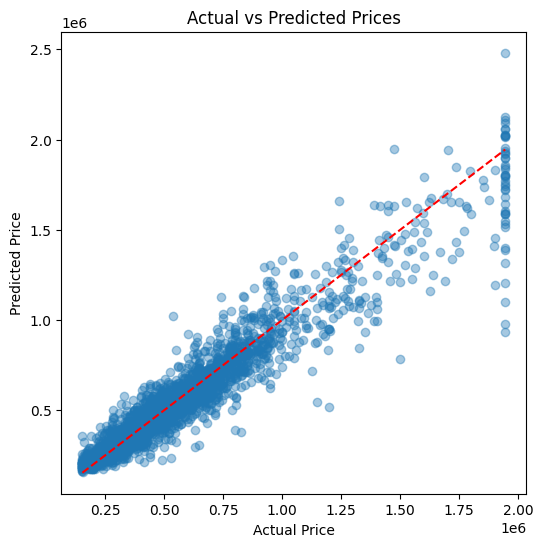

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


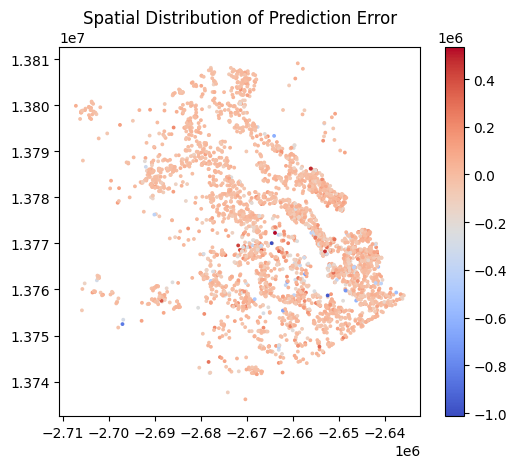

In [ ]:
test_gdf["pred_price"] = y_pred
test_gdf["error"] = test_gdf["pred_price"] - test_gdf["price"]
test_gdf.plot(column="error", cmap="coolwarm", legend=True, markersize=3)
plt.title("Spatial Distribution of Prediction Error")
plt.show()

living_grade             0.179728
grade                    0.144297
cluster_0                0.115574
lat                      0.092135
zipcode_98004            0.029648
grade_cluster            0.026490
living_distance_ratio    0.026097
avg_living_nearby        0.024042
zipcode_98070            0.023939
cluster_1                0.023298
dtype: float32


/tmp/ipython-input-3038090713.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train)


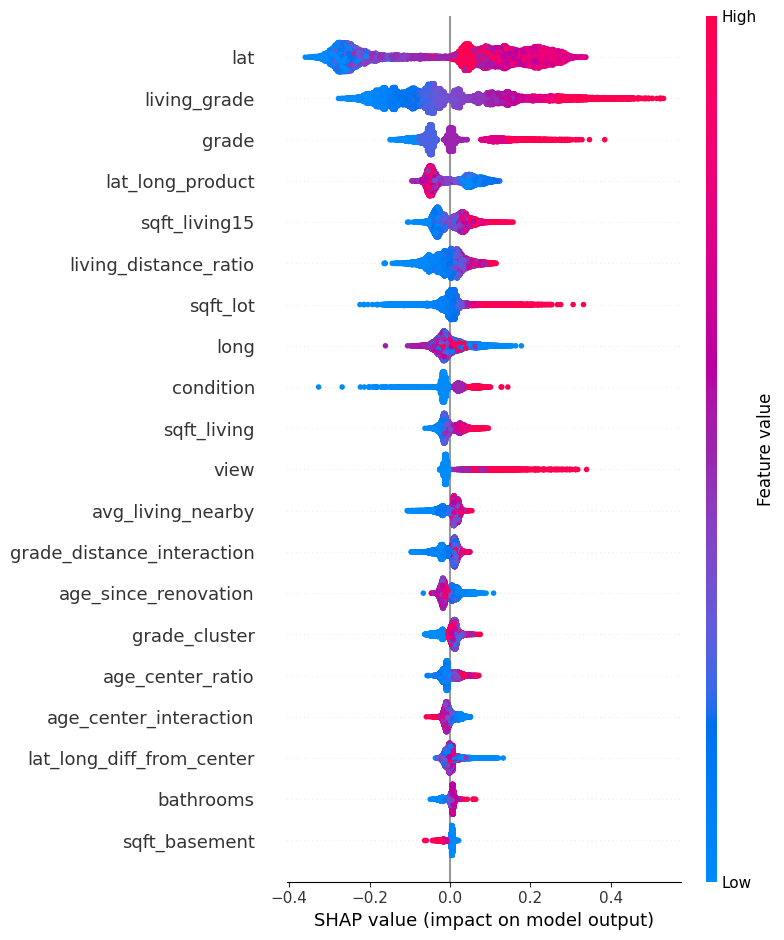

In [ ]:
#feature imp by xg boost
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importance.head(10))
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)


lat                      0.105633
living_grade             0.103616
sqft_living              0.071859
grade                    0.068648
avg_living_nearby        0.067039
lat_long_product         0.054182
living_distance_ratio    0.053716
sqft_living15            0.046229
grade_cluster            0.042273
sqft_above               0.040590
dtype: float64


/tmp/ipython-input-3868088405.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train)


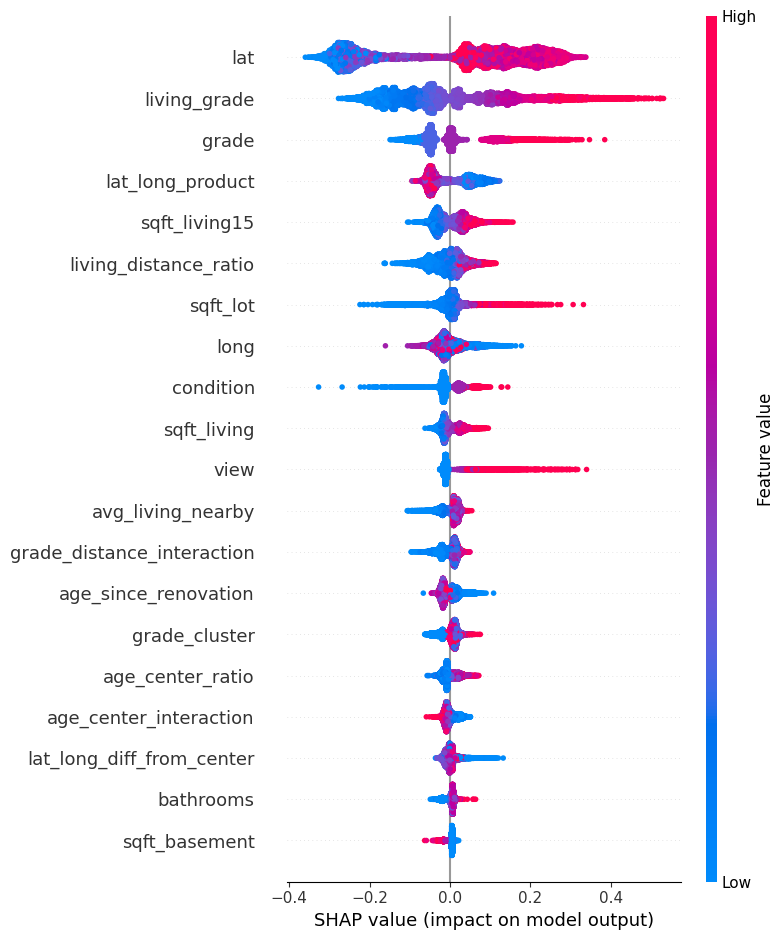

In [ ]:
#feature importance of random forest model
importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importance.head(10))

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)


In [ ]:
#test data

df_test['grade_cluster'] = df_test['grade'] * df_test['location_cluster']
df_test['living_grade'] = df_test['sqft_living'] * df_test['grade']

df_test['bed_bath_ratio'] = df_test['bedrooms'] / df_test['bathrooms'].replace(0, 1)
df_test['basement_ratio'] = df_test['sqft_basement'] / df_test['sqft_living'].replace(0, 1)


df_test['age'] = CURRENT_YEAR - df_test['yr_built']
df_test['renovated_age'] = np.where(
    df_test['yr_renovated'] > 0,
    CURRENT_YEAR - df_test['yr_renovated'],
    0
)

df_test['age_since_renovation'] = np.where(
    df_test['yr_renovated'] > 0,
    CURRENT_YEAR - df_test['yr_renovated'],
    df_test['age']
)

df_test['floors_squared'] = df_test['floors'] ** 2

df_test['living_distance_ratio'] = df_test['sqft_living'] / df_test['dist_to_center'].replace(0, 1)
df_test['age_center_ratio'] = df_test['age'] / df_test['dist_to_center'].replace(0, 1)
df_test['grade_distance_interaction'] = df_test['grade'] / df_test['dist_to_center'].replace(0, 1)

df_test['lat_long_product'] = df_test['lat'] * df_test['long']

df_test['lat_long_diff_from_center'] = np.sqrt(
    (df_test['lat'] - center_lat) ** 2 +
    (df_test['long'] - center_long) ** 2
)

test_dummies = pd.get_dummies(
    df_test['location_cluster'],
    prefix='cluster'
)

cluster_columns = cluster_dummies.columns.tolist()

test_dummies = test_dummies.reindex(
    columns=cluster_columns,   # from training
    fill_value=0
)

df_test = pd.concat([df_test, test_dummies], axis=1)
df_test.drop(columns=['location_cluster'], inplace=True)

df_test["grid_x"] = ((df_test.geometry.x - x0) // cell_size).astype(int)
df_test["grid_y"] = ((df_test.geometry.y - y0) // cell_size).astype(int)


#Fetching Images using Sentinel API and GEE rois

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/satellite_images_project/test_data_final.csv")

In [ ]:
#downloaded from google earth imagine
image_df=pd.read_csv('/content/drive/MyDrive/satellite_images_project/seattle_housing_features.csv')

In [ ]:
image_df_test=pd.read_csv('/content/drive/MyDrive/satellite_images_project/seattle_housing_features_test.csv')

In [ ]:
image_df.head()

system:index   Elevation      NDBI      NDVI      NDWI     Slope  \
0  00000000000000002f52   25.037092 -0.148192  0.537245 -0.519986  5.691874   
1  00000000000000002fc0   24.875184 -0.148991  0.538044 -0.520767  5.638024   
2  000000000000000005d9   28.503032 -0.149838  0.553971 -0.537807  6.585465   
3  00000000000000000306  120.623959 -0.229375  0.706516 -0.655462  4.860749   
4  00000000000000001ef2  126.675779 -0.167614  0.586328 -0.519491  5.559960   

   bathrooms  bedrooms  condition             date  ...  sqft_living  \
0       1.00         3          4  20150501T000000  ...         1150   
1       1.00         2          4  20150326T000000  ...          840   
2       1.00         2          3  20141205T000000  ...         1000   
3       1.00         3          4  20140513T000000  ...         1900   
4       1.75         3          4  20141120T000000  ...         1380   

   sqft_living15  sqft_lot  sqft_lot15  view  waterfront  yr_built  \
0           1100      6480        7300     0           0      1946   
1           1100      6480        7300     0           0      1954   
2           1350     16524       10208     0           0      1913   
3           1430     33888       19200     0           0      1942   
4           1490     14000       18503     0           0      1939   

   yr_renovated  zipcode                                               .geo  
0             0    98001  {"geodesic":false,"type":"Polygon","coordinate...  
1             0    98001  {"geodesic":false,"type":"Polygon","coordinate...  
2             0    98001  {"geodesic":false,"type":"Polygon","coordinate...  
3             0    98001  {"geodesic":false,"type":"Polygon","coordinate...  
4          1957    98001  {"geodesic":false,"type":"Polygon","coordinate...  

[5 rows x 27 columns]

In [ ]:
image_df['.geo'][0]

'{"geodesic":false,"type":"Polygon","coordinates":[[[-122.2645813526543,47.25969932096308],[-122.25140786755901,47.25969932096308],[-122.25140786755901,47.268696457964815],[-122.2645813526543,47.268696457964815],[-122.2645813526543,47.25969932096308]]]}'

In [ ]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   system:index   16209 non-null  object 
 1   Elevation      16209 non-null  float64
 2   NDBI           16209 non-null  float64
 3   NDVI           16209 non-null  float64
 4   NDWI           16209 non-null  float64
 5   Slope          16209 non-null  float64
 6   bathrooms      16209 non-null  float64
 7   bedrooms       16209 non-null  int64  
 8   condition      16209 non-null  int64  
 9   date           16209 non-null  object 
 10  dist_water     16209 non-null  float64
 11  floors         16209 non-null  float64
 12  grade          16209 non-null  int64  
 13  id             16209 non-null  int64  
 14  price          16209 non-null  int64  
 15  sqft_above     16209 non-null  int64  
 16  sqft_basement  16209 non-null  int64  
 17  sqft_living    16209 non-null  int64  
 18  sqft_l

In [ ]:
pip install geopandas shapely

In [ ]:
pip install pystac-client planetary-computer rasterio numpy imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 kB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
import geopandas as gpd
from shapely.geometry import shape

image_df["geometry"] = image_df[".geo"].apply(lambda x: shape(json.loads(x)))
image_gdf = gpd.GeoDataFrame(image_df, geometry="geometry", crs="EPSG:4326")


image_df_test["geometry"] = image_df_test[".geo"].apply(lambda x: shape(json.loads(x)))
image_gdf_test = gpd.GeoDataFrame(image_df_test, geometry="geometry", crs="EPSG:4326")



In [ ]:
image_gdf

system:index   Elevation      NDBI      NDVI      NDWI  \
0      00000000000000002f52   25.037092 -0.148192  0.537245 -0.519986   
1      00000000000000002fc0   24.875184 -0.148991  0.538044 -0.520767   
2      000000000000000005d9   28.503032 -0.149838  0.553971 -0.537807   
3      00000000000000000306  120.623959 -0.229375  0.706516 -0.655462   
4      00000000000000001ef2  126.675779 -0.167614  0.586328 -0.519491   
...                     ...         ...       ...       ...       ...   
16204  00000000000000001fec   85.814251 -0.136983  0.508243 -0.495170   
16205  00000000000000002466   84.681888 -0.148953  0.517594 -0.499854   
16206  00000000000000001c01   72.156186 -0.119312  0.475926 -0.464405   
16207  0000000000000000308e   75.431711 -0.108782  0.465630 -0.459448   
16208  00000000000000002e8b   79.200622 -0.175604  0.526316 -0.490994   

          Slope  bathrooms  bedrooms  condition             date  ...  \
0      5.691874       1.00         3          4  20150501T000000  ...   
1      5.638024       1.00         2          4  20150326T000000  ...   
2      6.585465       1.00         2          3  20141205T000000  ...   
3      4.860749       1.00         3          4  20140513T000000  ...   
4      5.559960       1.75         3          4  20141120T000000  ...   
...         ...        ...       ...        ...              ...  ...   
16204  7.147139       3.25         4          4  20150501T000000  ...   
16205  7.865219       3.25         5          5  20150415T000000  ...   
16206  6.022751       4.50         3          3  20141205T000000  ...   
16207  5.114736       3.50         4          3  20150401T000000  ...   
16208  7.741755       4.50         5          3  20150203T000000  ...   

       sqft_living15  sqft_lot  sqft_lot15  view  waterfront  yr_built  \
0               1100      6480        7300     0           0      1946   
1               1100      6480        7300     0           0      1954   
2               1350     16524       10208     0           0      1913   
3               1430     33888       19200     0           0      1942   
4               1490     14000       18503     0           0      1939   
...              ...       ...         ...   ...         ...       ...   
16204           3070      7500        7500     2           0      1933   
16205           2920     12793        8609     2           0      1928   
16206           3050      6134        5281     3           0      1998   
16207           1940      8580        7920     0           0      2007   
16208           2360      5800        5800     3           0      1999   

       yr_renovated  zipcode  \
0                 0    98001   
1                 0    98001   
2                 0    98001   
3                 0    98001   
4              1957    98001   
...             ...      ...   
16204             0    98199   
16205             0    98199   
16206             0    98199   
16207             0    98199   
16208             0    98199   

                                                    .geo  \
0      {"geodesic":false,"type":"Polygon","coordinate...   
1      {"geodesic":false,"type":"Polygon","coordinate...   
2      {"geodesic":false,"type":"Polygon","coordinate...   
3      {"geodesic":false,"type":"Polygon","coordinate...   
4      {"geodesic":false,"type":"Polygon","coordinate...   
...                                                  ...   
16204  {"geodesic":false,"type":"Polygon","coordinate...   
16205  {"geodesic":false,"type":"Polygon","coordinate...   
16206  {"geodesic":false,"type":"Polygon","coordinate...   
16207  {"geodesic":false,"type":"Polygon","coordinate...   
16208  {"geodesic":false,"type":"Polygon","coordinate...   

                                                geometry  
0      POLYGON ((-122.26458 47.2597, -122.25141 47.25...  
1      POLYGON ((-122.26458 47.2595, -122.25141 47.25...  
2      POLYGON ((-122.26157 47.2796, -122.2484 47.279...  
3      POLYGON ((-122.27758 47

In [ ]:
image_gdf_test

system:index   Elevation      NDBI      NDVI      NDWI  \
0     00000000000000000bd8  128.612141 -0.177871  0.615138 -0.571312   
1     000000000000000001e3  140.301282 -0.180143  0.620339 -0.594136   
2     00000000000000000460   66.349233 -0.100751  0.389898 -0.381999   
3     0000000000000000120e   41.450833 -0.092609  0.362572 -0.367142   
4     0000000000000000097e  135.326455 -0.393622  0.841581 -0.749602   
...                    ...         ...       ...       ...       ...   
5399  00000000000000001079   54.621614 -0.187244  0.372527 -0.237690   
5400  00000000000000000c60  298.412106 -0.367678  0.831166 -0.753654   
5401  000000000000000009c9   42.009010 -0.177477  0.302478 -0.161036   
5402  00000000000000000d61   54.055744 -0.096891  0.445215 -0.445127   
5403  00000000000000000ccb  177.646830 -0.290193  0.779499 -0.717563   

          Slope  bathrooms  bedrooms  condition             date  ...  \
0      2.776422       0.00         0          3  20141223T000000  ...   
1      4.405313       0.00         0          3  20150429T000000  ...   
2      7.880404       0.00         0          3  20140612T000000  ...   
3      7.474829       0.50         1          3  20140814T000000  ...   
4      5.136617       0.75         0          3  20141029T000000  ...   
...         ...        ...       ...        ...              ...  ...   
5399   8.798553       6.25         5          3  20140611T000000  ...   
5400  18.056973       6.50         5          3  20140509T000000  ...   
5401   6.974855       6.75         7          3  20141007T000000  ...   
5402   5.009513       7.50         9          3  20140811T000000  ...   
5403   7.991486       8.00         7          3  20140505T000000  ...   

      sqft_living15  sqft_lot  sqft_lot15  view  waterfront  yr_built  \
0              1060      4800        7200     0           0      1996   
1              2520      8049        8050     0           0      1990   
2              2360      4764        4000     2           0      1990   
3              1410      1642        2992     0           0      1910   
4              1920    213444      224341     0           0      2003   
...             ...       ...         ...   ...         ...       ...   
5399           4140     64033       81021     4           0      1965   
5400           1800    130017       44890     0           0      2010   
5401           2810     41664       33190     2           0      1953   
5402           1448      6504        3866     0           0      1996   
5403           4850    307752      217800     4           0      1999   

      yr_renovated  zipcode  \
0                0    98065   
1                0    98031   
2                0    98102   
3                0    98126   
4                0    98070   
...            ...      ...   
5399          2003    98177   
5400             0    98027   
5401             0    98166   
5402             0    98144   
5403             0    98053   

                                                   .geo  \
0     {"geodesic":false,"type":"Polygon","coordinate...   
1     {"geodesic":false,"type":"Polygon","coordinate...   
2     {"geodesic":false,"type":"Polygon","coordinate...   
3     {"geodesic":false,"type":"Polygon","coordinate...   
4     {"geodesic":false,"type":"Polygon","coordinate...   
...                                                 ...   
5399  {"geodesic":false,"type":"Polygon","coordinate...   
5400  {"geodesic":false,"type":"Polygon","coordinate...   
5401  {"geodesic":false,"type":"Polygon","coordinate...   
5402  {"geodesic":false,"type":"Polygon","coordinate...   
5403  {"geodesic":false,"type":"Polygon","coordinate...   

                                               geometry  
0     POLYGON ((-121.83461 47.522, -121.82137 47.522...  
1     POLYGON ((-122.17459 47.405, -122.16138 47.405...  
2     POLYGON ((-122.32862 47.6317, -122.31535 47.63...  
3     POLYGON ((-122.37862 47.5687, -122.36537 47.56...  
4     POLYGON ((-122.49

In [ ]:
from pystac_client import Client
import planetary_computer as pc

catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=pc.sign_inplace
)


In [ ]:
geom = image_gdf.geometry.iloc[0]

search = catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=geom.__geo_interface__,
    datetime="2020-01-01/2020-12-31",
    query={"eo:cloud_cover": {"lt": 20}},
)

items = list(search.items())
print(len(items))


33


In [ ]:
item = sorted(items, key=lambda x: x.properties["eo:cloud_cover"])[0]


In [ ]:
from rasterio.warp import transform_geom
from rasterio.mask import mask
import rasterio
import numpy as np

imgs = []

for band in ["B04", "B03", "B02"]:
    with rasterio.open(item.assets[band].href) as src:
        geom_proj = transform_geom(
            "EPSG:4326",
            src.crs,
            geom.__geo_interface__
        )

        try:
            clipped, _ = mask(src, [geom_proj], crop=True)
            imgs.append(clipped[0])
        except ValueError:
            print(f"Polygon does not overlap {band}, skipping")
            imgs = []
            break

rgb = np.stack(imgs, axis=-1)

In [ ]:
import imageio

rgb = np.clip(rgb / 3000, 0, 1)
imageio.imwrite("house_0.png", (rgb * 255).astype("uint8"))


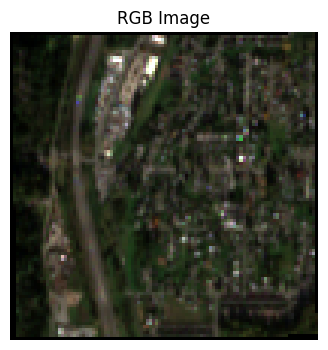

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(rgb)
plt.axis("off")
plt.title("RGB Image")
plt.show()


In [ ]:
import os
import numpy as np
import imageio
import rasterio
from rasterio.mask import mask
from rasterio.warp import transform_geom

os.makedirs("drive/MyDrive/satellite_images_project/images", exist_ok=True)


# Loop over your geometries
for i, geom in enumerate(image_gdf.geometry):
    search = catalog.search(
        collections=["sentinel-2-l2a"],
        intersects=geom.__geo_interface__,
        datetime="2020-01-01/2020-12-31",
        query={"eo:cloud_cover": {"lt": 20}},
    )

    # Use the new items() method
    items = list(search.items())
    if not items:
        print(f"No items found for geometry {i}, skipping...")
        continue

    # Pick the item with least cloud cover
    item = sorted(items, key=lambda x: x.properties.get("eo:cloud_cover", 100))[0]

    imgs = []
    for band in ["B04", "B03", "B02"]:
        if band not in item.assets:
            print(f"Band {band} missing in item {item.id}, skipping this item")
            imgs = []
            break

        with rasterio.open(item.assets[band].href) as src:
            # Transform polygon to image CRS
            geom_proj = transform_geom(
                "EPSG:4326",
                src.crs,
                geom.__geo_interface__
            )

            try:
                clipped, _ = mask(src, [geom_proj], crop=True)
                imgs.append(clipped[0])
            except ValueError:
                print(f"Polygon does not overlap {band} for geometry {i}, skipping")
                imgs = []
                break

    if imgs:
        # Stack bands to form RGB
        rgb = np.stack(imgs, axis=-1)
        rgb = np.clip(rgb / 3000, 0, 1)

        # Save image
        imageio.imwrite(
            f"drive/MyDrive/satellite_images_project/images/house_{i}.png",
            (rgb * 255).astype("uint8")
        )
        print(f"Saved house_{i}.png")


Streaming output truncated to the last 5000 lines.
Saved house_50.png
Saved house_51.png
Saved house_52.png
Saved house_53.png
Saved house_54.png
Saved house_55.png
Saved house_56.png
Saved house_57.png
Saved house_58.png
Saved house_59.png
Saved house_60.png
Saved house_61.png
Saved house_62.png
Saved house_63.png
Saved house_64.png
Saved house_65.png
Saved house_66.png
Saved house_67.png
Saved house_68.png
Saved house_69.png
Saved house_70.png
Saved house_71.png
Saved house_72.png
Saved house_73.png
Saved house_74.png
Saved house_75.png
Saved house_76.png
Saved house_77.png
Saved house_78.png
Saved house_79.png
Saved house_80.png
Saved house_81.png
Saved house_82.png
Saved house_83.png
Saved house_84.png
Saved house_85.png
Saved house_86.png
Saved house_87.png
Saved house_88.png
Saved house_89.png
Saved house_90.png
Saved house_91.png
Saved house_92.png
Saved house_93.png
Saved house_94.png
Saved house_95.png
Saved house_96.png
Saved house_97.png
Saved house_98.png
Saved house_99.png

APIError: <html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx</center>
</body>
</html>


In [ ]:
import os
import numpy as np
import imageio
import rasterio
from rasterio.mask import mask
from rasterio.warp import transform_geom

os.makedirs("drive/MyDrive/satellite_images_project/images", exist_ok=True)
start_idx = 5048  # resume from here

for i, geom in enumerate(image_gdf.geometry[start_idx:], start=start_idx):
    search = catalog.search(
        collections=["sentinel-2-l2a"],
        intersects=geom.__geo_interface__,
        datetime="2020-01-01/2020-12-31",
        query={"eo:cloud_cover": {"lt": 20}},
    )

    # Use the new items() method
    items = list(search.items())
    if not items:
        print(f"No items found for geometry {i}, skipping...")
        continue

    # Pick the item with least cloud cover
    item = sorted(items, key=lambda x: x.properties.get("eo:cloud_cover", 100))[0]

    imgs = []
    for band in ["B04", "B03", "B02"]:
        if band not in item.assets:
            print(f"Band {band} missing in item {item.id}, skipping this item")
            imgs = []
            break

        with rasterio.open(item.assets[band].href) as src:
            # Transform polygon to image CRS
            geom_proj = transform_geom(
                "EPSG:4326",
                src.crs,
                geom.__geo_interface__
            )

            try:
                clipped, _ = mask(src, [geom_proj], crop=True)
                imgs.append(clipped[0])
            except ValueError:
                print(f"Polygon does not overlap {band} for geometry {i}, skipping")
                imgs = []
                break

    if imgs:
        # Stack bands to form RGB
        rgb = np.stack(imgs, axis=-1)
        rgb = np.clip(rgb / 3000, 0, 1)

        # Save image
        imageio.imwrite(
            f"drive/MyDrive/satellite_images_project/images/house_{i}.png",
            (rgb * 255).astype("uint8")
        )
        print(f"Saved house_{i}.png")


Streaming output truncated to the last 5000 lines.
Saved house_7494.png
Saved house_7495.png
Saved house_7496.png
Saved house_7497.png
Saved house_7498.png
Saved house_7499.png
Saved house_7500.png
Saved house_7501.png
Saved house_7502.png
Saved house_7503.png
Saved house_7504.png
Saved house_7505.png
Saved house_7506.png
Saved house_7507.png
Saved house_7508.png
Saved house_7509.png
Saved house_7510.png
Saved house_7511.png
Saved house_7512.png
Saved house_7513.png
Saved house_7514.png
Saved house_7515.png
Saved house_7516.png
Saved house_7517.png
Saved house_7518.png
Saved house_7519.png
Saved house_7520.png
Saved house_7521.png
Saved house_7522.png
Saved house_7523.png
Saved house_7524.png
Saved house_7525.png
Saved house_7526.png
Saved house_7527.png
Saved house_7528.png
Saved house_7529.png
Saved house_7530.png
Saved house_7531.png
Saved house_7532.png
Saved house_7533.png
Saved house_7534.png
Saved house_7535.png
Saved house_7536.png
Saved house_7537.png
Saved house_7538.png
Save

In [ ]:
#test images


import os
import numpy as np
import imageio
import rasterio
from rasterio.mask import mask
from rasterio.warp import transform_geom

os.makedirs("drive/MyDrive/satellite_images_project/images_test", exist_ok=True)


# Loop over your geometries
for i, geom in enumerate(image_gdf_test.geometry):
    search = catalog.search(
        collections=["sentinel-2-l2a"],
        intersects=geom.__geo_interface__,
        datetime="2020-01-01/2020-12-31",
        query={"eo:cloud_cover": {"lt": 20}},
    )

    # Use the new items() method
    items = list(search.items())
    if not items:
        print(f"No items found for geometry {i}, skipping...")
        continue

    # Pick the item with least cloud cover
    item = sorted(items, key=lambda x: x.properties.get("eo:cloud_cover", 100))[0]

    imgs = []
    for band in ["B04", "B03", "B02"]:
        if band not in item.assets:
            print(f"Band {band} missing in item {item.id}, skipping this item")
            imgs = []
            break

        with rasterio.open(item.assets[band].href) as src:
            # Transform polygon to image CRS
            geom_proj = transform_geom(
                "EPSG:4326",
                src.crs,
                geom.__geo_interface__
            )

            try:
                clipped, _ = mask(src, [geom_proj], crop=True)
                imgs.append(clipped[0])
            except ValueError:
                print(f"Polygon does not overlap {band} for geometry {i}, skipping")
                imgs = []
                break

    if imgs:
        # Stack bands to form RGB
        rgb = np.stack(imgs, axis=-1)
        rgb = np.clip(rgb / 3000, 0, 1)

        # Save image
        imageio.imwrite(
            f"drive/MyDrive/satellite_images_project/images_test/house_{i}.png",
            (rgb * 255).astype("uint8")
        )
        print(f"Saved house_{i}.png")


Streaming output truncated to the last 5000 lines.
Saved house_404.png
Saved house_405.png
Saved house_406.png
Saved house_407.png
Saved house_408.png
Saved house_409.png
Saved house_410.png
Polygon does not overlap B04 for geometry 411, skipping
Saved house_412.png
Saved house_413.png
Saved house_414.png
Saved house_415.png
Saved house_416.png
Saved house_417.png
Saved house_418.png
Saved house_419.png
Saved house_420.png
Saved house_421.png
Saved house_422.png
Saved house_423.png
Saved house_424.png
Saved house_425.png
Saved house_426.png
Saved house_427.png
Saved house_428.png
Saved house_429.png
Saved house_430.png
Saved house_431.png
Saved house_432.png
Saved house_433.png
Saved house_434.png
Saved house_435.png
Saved house_436.png
Saved house_437.png
Saved house_438.png
Saved house_439.png
Saved house_440.png
Saved house_441.png
Saved house_442.png
Saved house_443.png
Saved house_444.png
Saved house_445.png
Saved house_446.png
Saved house_447.png
Saved house_448.png
Saved house_4

#Checking images

In [ ]:
import os

image_dir = "drive/MyDrive/satellite_images_project/images"

# Expected indices (based on number of polygons)
expected = set(range(len(df)))

# Existing indices from filenames
existing = set()
for f in os.listdir(image_dir):
    if f.startswith("house_") and f.endswith(".png"):
        idx = int(f.split("_")[1].split(".")[0])
        existing.add(idx)

missing = sorted(expected - existing)

print(f"Total polygons: {len(expected)}")
print(f"Images found: {len(existing)}")
print(f"Missing images: {len(missing)}")

# Show first few missing ones
print("First 20 missing indices:", missing[:20])


Total polygons: 16209
Images found: 16149
Missing images: 60
First 20 missing indices: [1765, 1799, 1830, 1831, 1858, 1864, 1868, 2115, 3027, 3040, 3226, 8296, 8297, 8298, 8330, 8337, 8355, 8375, 8376, 8377]


In [ ]:
#test data
image_dir = "drive/MyDrive/satellite_images_project/images_test"

# Expected indices (based on number of polygons)
expected = set(range(len(df_test)))

# Existing indices from filenames
existing = set()
for f in os.listdir(image_dir):
    if f.startswith("house_") and f.endswith(".png"):
        idx = int(f.split("_")[1].split(".")[0])
        existing.add(idx)

missing_test = sorted(expected - existing)

print(f"Total polygons: {len(expected)}")
print(f"Images found: {len(existing)}")
print(f"Missing images: {len(missing)}")

# Show first few missing ones
print("missing indices:", missing_test)


Total polygons: 5404
Images found: 5384
Missing images: 60
missing indices: [411, 610, 1025, 1047, 1203, 1566, 1609, 1747, 1856, 1934, 2153, 2189, 2292, 2332, 2675, 2691, 2778, 2793, 3168, 4512]


In [ ]:
missing_pct = 100 * len(missing) / len(image_gdf)
print(f"Missing: {missing_pct:.2f}%")


Missing: 0.37%


In [ ]:
#write missing indices in a txt file to use later
with open("drive/MyDrive/satellite_images_project/missing_indices.txt", "w") as f:
    for idx in missing:
        f.write(f"{idx}\n")


In [ ]:
import numpy as np
import imageio

TRAIN_DIR='/content/drive/MyDrive/satellite_images_project/images_96'

DUMMY_IMG = np.zeros((96, 96, 3), dtype=np.uint8)
for idx in missing:
    imageio.imwrite(f"{TRAIN_DIR}/dummy{idx}.png", DUMMY_IMG)


In [ ]:
import numpy as np
import imageio

TEST_DIR='/content/drive/MyDrive/satellite_images_project/images_test'

DUMMY_IMG = np.zeros((96, 96, 3), dtype=np.uint8)
for idx in missing:
    imageio.imwrite(f"{TEST_DIR}/dummy{idx}.png", DUMMY_IMG)


/tmp/ipython-input-583747834.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.imread(f"{TEST_DIR}/dummy{411}.png")


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
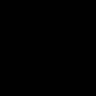

In [ ]:
 imageio.imread(f"{TEST_DIR}/dummy{411}.png")

In [ ]:
#test data
image_dir = "drive/MyDrive/satellite_images_project/images_test"

# Expected indices (based on number of polygons)
expected = set(range(len(image_gdf_test)))

# Existing indices from filenames
existing = set()
for f in os.listdir(image_dir):
    if f.startswith("house_") and f.endswith(".png"):
        idx = int(f.split("_")[1].split(".")[0])
        existing.add(idx)
    elif f.endswith('png'):
        idx=int(f.split('dummy')[1].split('.')[0])
        existing.add(idx)

missing = sorted(expected - existing)

print(f"Total polygons: {len(expected)}")
print(f"Images found: {len(existing)}")
print(f"Missing images: {len(missing)}")

# Show first few missing ones
print("First 20 missing indices:", missing[:20])


Total polygons: 5404
Images found: 5404
Missing images: 0
First 20 missing indices: []


In [ ]:
#analysing shape of  the images
import os
import imageio
from collections import Counter

image_dir = "drive/MyDrive/satellite_images_project/images"

sizes = []

for f in os.listdir(image_dir):
    if f.endswith(".png"):
        img = imageio.imread(os.path.join(image_dir, f))
        sizes.append(img.shape[:2])  # (height, width)
        print(f"img{f} has shape {img.shape[:2]}")

size_counts = Counter(sizes)

for size, count in size_counts.items():
    print(f"{size}: {count} images")


/tmp/ipython-input-1752112307.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join(image_dir, f))


Streaming output truncated to the last 5000 lines.
imghouse_4460.png has shape (102, 101)
imghouse_4461.png has shape (102, 101)
imghouse_4462.png has shape (102, 101)
imghouse_4463.png has shape (102, 102)
imghouse_4464.png has shape (102, 102)
imghouse_4465.png has shape (102, 102)
imghouse_4466.png has shape (102, 102)
imghouse_4467.png has shape (102, 102)
imghouse_4468.png has shape (102, 101)
imghouse_4469.png has shape (102, 102)
imghouse_4470.png has shape (102, 101)
imghouse_4471.png has shape (103, 102)
imghouse_4472.png has shape (102, 102)
imghouse_4473.png has shape (102, 102)
imghouse_4474.png has shape (102, 102)
imghouse_4475.png has shape (102, 102)
imghouse_4476.png has shape (102, 102)
imghouse_4477.png has shape (102, 101)
imghouse_4478.png has shape (102, 102)
imghouse_4479.png has shape (102, 102)
imghouse_4480.png has shape (102, 102)
imghouse_4481.png has shape (102, 102)
imghouse_4482.png has shape (102, 102)
imghouse_4483.png has shape (102, 102)
imghouse_4484

In [ ]:

size_counts = Counter(sizes)

for size, count in size_counts.items():
    print(f"{size}: {count} images")

(102, 101): 2622 images
(102, 102): 3117 images
(101, 101): 470 images
(101, 102): 505 images
(94, 102): 1 images
(27, 102): 1 images
(35, 102): 1 images
(30, 102): 5 images
(57, 101): 1 images
(73, 101): 1 images
(31, 101): 2 images
(97, 102): 1 images
(58, 102): 1 images
(37, 102): 1 images
(32, 102): 1 images
(15, 102): 3 images
(11, 102): 1 images
(66, 102): 2 images
(1, 102): 1 images
(85, 101): 2 images
(19, 101): 1 images
(15, 101): 2 images
(10, 101): 1 images
(21, 101): 2 images
(39, 102): 1 images
(25, 102): 2 images
(2, 101): 1 images
(56, 101): 1 images
(51, 102): 1 images
(83, 101): 2 images
(79, 102): 2 images
(18, 101): 1 images
(23, 102): 1 images
(14, 102): 1 images
(75, 102): 1 images
(53, 102): 2 images
(77, 102): 1 images
(99, 102): 2 images
(72, 102): 1 images
(84, 102): 1 images
(82, 101): 1 images
(33, 101): 2 images
(67, 102): 1 images
(57, 102): 1 images
(46, 102): 1 images
(27, 101): 1 images
(13, 102): 2 images
(19, 102): 2 images
(28, 101): 1 images
(1, 101)

In [ ]:
#analysing shape of  the test images, we see it is similar to train images
import os
import imageio
from collections import Counter

image_dir = "drive/MyDrive/satellite_images_project/images_test"

sizes = []

for f in os.listdir(image_dir):
    if f.endswith(".png"):
        img = imageio.imread(os.path.join(image_dir, f))
        sizes.append(img.shape[:2])  # (height, width)
        print(f"img{f} has shape {img.shape[:2]}")

size_counts = Counter(sizes)

for size, count in size_counts.items():
    print(f"{size}: {count} images")


/tmp/ipython-input-1466320583.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join(image_dir, f))


Streaming output truncated to the last 5000 lines.
imghouse_488.png has shape (102, 101)
imghouse_489.png has shape (102, 102)
imghouse_490.png has shape (102, 102)
imghouse_491.png has shape (102, 101)
imghouse_492.png has shape (101, 102)
imghouse_493.png has shape (102, 102)
imghouse_494.png has shape (98, 101)
imghouse_495.png has shape (102, 102)
imghouse_496.png has shape (102, 102)
imghouse_497.png has shape (102, 101)
imghouse_498.png has shape (102, 102)
imghouse_499.png has shape (103, 102)
imghouse_500.png has shape (102, 102)
imghouse_501.png has shape (102, 102)
imghouse_502.png has shape (102, 102)
imghouse_503.png has shape (102, 102)
imghouse_504.png has shape (102, 102)
imghouse_505.png has shape (102, 101)
imghouse_506.png has shape (102, 102)
imghouse_507.png has shape (102, 102)
imghouse_508.png has shape (101, 102)
imghouse_509.png has shape (102, 102)
imghouse_510.png has shape (103, 101)
imghouse_511.png has shape (102, 101)
imghouse_512.png has shape (102, 101)


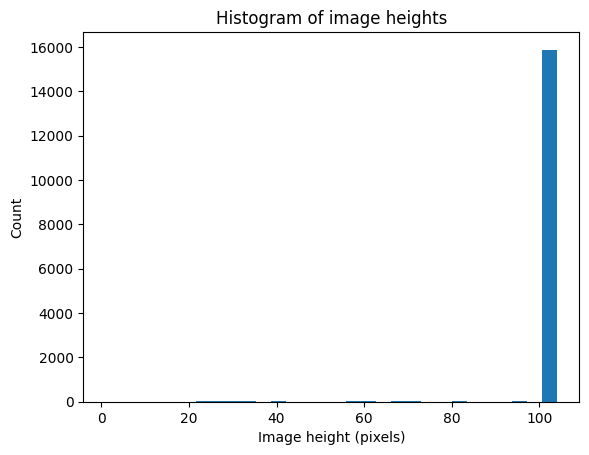

In [ ]:
import matplotlib.pyplot as plt

heights = [h for h, w in sizes]

plt.figure()
plt.hist(heights, bins=30)
plt.xlabel("Image height (pixels)")
plt.ylabel("Count")
plt.title("Histogram of image heights")
plt.show()


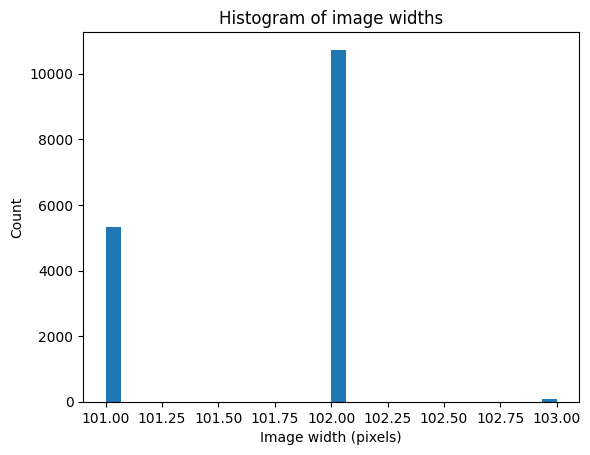

In [ ]:
widths = [w for h, w in sizes]

plt.figure()
plt.hist(widths, bins=30)
plt.xlabel("Image width (pixels)")
plt.ylabel("Count")
plt.title("Histogram of image widths")
plt.show()


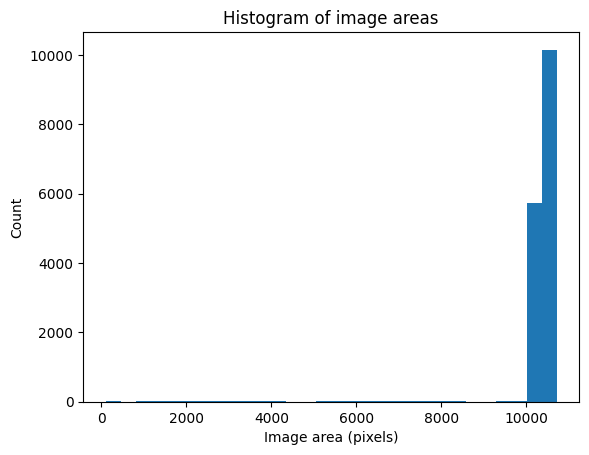

In [ ]:
areas = [h * w for h, w in sizes]

plt.figure()
plt.hist(areas, bins=30)
plt.xlabel("Image area (pixels)")
plt.ylabel("Count")
plt.title("Histogram of image areas")
plt.show()


In [ ]:
import numpy as np

print("Min area:", np.min(areas))
print("25th percentile:", np.percentile(areas, 25))
print("Median area:", np.percentile(areas, 50))
print("75th percentile:", np.percentile(areas, 75))
print("Max area:", np.max(areas))


Min area: 101
25th percentile: 10302.0
Median area: 10404.0
75th percentile: 10404.0
Max area: 10712


In [ ]:
MIN_AREA = 1000  # very safe threshold

filtered_sizes = [
    (h, w) for h, w in sizes if h * w >= MIN_AREA
]


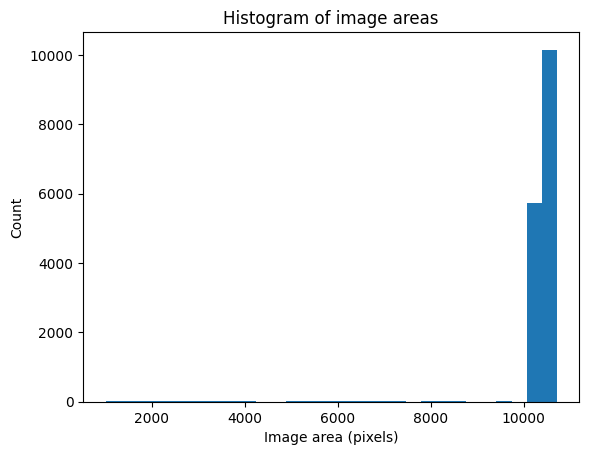

In [ ]:
areas = [h * w for h, w in filtered_sizes]

plt.figure()
plt.hist(areas, bins=30)
plt.xlabel("Image area (pixels)")
plt.ylabel("Count")
plt.title("Histogram of image areas")
plt.show()


In [ ]:
import numpy as np

print("Min area:", np.min(areas))
print("25th percentile:", np.percentile(areas, 25))
print("Median area:", np.percentile(areas, 50))
print("75th percentile:", np.percentile(areas, 75))
print("Max area:", np.max(areas))


Min area: 1010
25th percentile: 10302.0
Median area: 10404.0
75th percentile: 10404.0
Max area: 10712


In [ ]:
import cv2
import imageio
import os

#all images resized to 96x96 and saved

input_dir = "drive/MyDrive/satellite_images_project/images"
output_dir = "drive/MyDrive/satellite_images_project/images_96"
os.makedirs(output_dir, exist_ok=True)

for f in os.listdir(input_dir):
    if not f.endswith(".png"):
        continue

    img = imageio.imread(os.path.join(input_dir, f))
    img_resized = cv2.resize(
        img, (96, 96), interpolation=cv2.INTER_AREA
    )

    imageio.imwrite(os.path.join(output_dir, f), img_resized)


In [ ]:
import cv2
import imageio
import os

input_dir = "drive/MyDrive/satellite_images_project/images"
output_dir = "drive/MyDrive/satellite_images_project/images_96"
os.makedirs(output_dir, exist_ok=True)

resized_files = set(os.listdir(output_dir))

count = 0
for f in os.listdir(input_dir):
    if not f.endswith(".png"):
        continue

    if f in resized_files:
        continue  # already done

    img = imageio.imread(os.path.join(input_dir, f))
    img_resized = cv2.resize(img, (96, 96), interpolation=cv2.INTER_AREA)

    imageio.imwrite(os.path.join(output_dir, f), img_resized)
    count += 1

    if count % 500 == 0:
        print(f"Resized {count} new images")


/tmp/ipython-input-77664871.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join(input_dir, f))


In [ ]:

input_dir = "drive/MyDrive/satellite_images_project/images"
output_dir = "drive/MyDrive/satellite_images_project/images_96"

print("Original:", len([f for f in os.listdir(input_dir) if f.endswith(".png")]))
print("Resized:", len([f for f in os.listdir(output_dir) if f.endswith(".png")]))


Original: 16149
Resized: 16149


In [ ]:
import cv2
import imageio
import os

#all test images resized to 96x96 and saved

input_dir = "drive/MyDrive/satellite_images_project/images_test"
output_dir = "drive/MyDrive/satellite_images_project/images_test_96"
os.makedirs(output_dir, exist_ok=True)

for f in os.listdir(input_dir):
    if not f.endswith(".png"):
        continue

    img = imageio.imread(os.path.join(input_dir, f))
    img_resized = cv2.resize(
        img, (96, 96), interpolation=cv2.INTER_AREA
    )

    imageio.imwrite(os.path.join(output_dir, f), img_resized)


/tmp/ipython-input-2282114613.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join(input_dir, f))


In [ ]:

input_dir = "drive/MyDrive/satellite_images_project/images_test"
output_dir = "drive/MyDrive/satellite_images_project/images_test_96"

print("Original:", len([f for f in os.listdir(input_dir) if f.endswith(".png")]))
print("Resized:", len([f for f in os.listdir(output_dir) if f.endswith(".png")]))


Original: 5404
Resized: 5404


#creating a merged dataframe

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16209 non-null  int64   
 1   date                         16209 non-null  object  
 2   price                        16209 non-null  int64   
 3   bedrooms                     16209 non-null  int64   
 4   bathrooms                    16209 non-null  float64 
 5   sqft_living                  16209 non-null  int64   
 6   sqft_lot                     16209 non-null  int64   
 7   floors                       16209 non-null  float64 
 8   waterfront                   16209 non-null  int64   
 9   view                         16209 non-null  int64   
 10  condition                    16209 non-null  int64   
 11  grade                        16209 non-null  int64   
 12  sqft_above                   16209 non-null  int64  

In [ ]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   system:index   16209 non-null  object 
 1   Elevation      16209 non-null  float64
 2   NDBI           16209 non-null  float64
 3   NDVI           16209 non-null  float64
 4   NDWI           16209 non-null  float64
 5   Slope          16209 non-null  float64
 6   bathrooms      16209 non-null  float64
 7   bedrooms       16209 non-null  int64  
 8   condition      16209 non-null  int64  
 9   date           16209 non-null  object 
 10  dist_water     16209 non-null  float64
 11  floors         16209 non-null  float64
 12  grade          16209 non-null  int64  
 13  id             16209 non-null  int64  
 14  price          16209 non-null  int64  
 15  sqft_above     16209 non-null  int64  
 16  sqft_basement  16209 non-null  int64  
 17  sqft_living    16209 non-null  int64  
 18  sqft_l

In [ ]:
gdf.shape,image_df.shape

((16209, 47), (16209, 28))

In [ ]:
# Check for duplicates in gdf
duplicates = gdf[gdf.duplicated('id', keep=False)]
print(f"Found {len(duplicates)} duplicate rows in gdf.")
print(duplicates['id'].unique())

Found 198 duplicate rows in gdf.
[2044500213 5430300171 2892700041 3293700496 1250201165 6623400187
 8645530010 6021501535 4302201085 5332200530 2568300045 8129700644
 5127001320  526059224 2023049218 4204400098 2143700830 8910500150
 1788800630 5101402435 3185600040 9407110710 7230400400 4305200070
 8161020060 1954420170 2560801222  643300040 8651510380 1545800290
 1232000810 7977201065 6021500970 2767603612 7856400240 5132000140
 9136103130  937000330 3523069060 1446403850 6632900574 8807810890
 9250900104 8103000110  726049190  795000620 7983000200 4031000520
 1524079093 1423049019 4139440480 4364700600 3262300940 5101405604
 7167000040 9809000020 5083000375 6300000226 1995200200 5282200015
 2206700215 6117501820  723049156 1823049202 2724049222 3904100089
 6791200120 7657000540 1254200015 6381500170 3935900232 2231500030
 7856400300 2473380920 3558900590 1788900230 7520000520 9222400605
 6669020290 2621600015 1721801010 5536100020 7129304540 3528000040
 1922059278  123039336 541760

In [ ]:
gdf[gdf['id'] == 2044500213]

id             date   price  bedrooms  bathrooms  sqft_living  \
119   2044500213  20150126T000000  449000         4        2.0         1870   
8742  2044500213  20140617T000000  310000         4        2.0         1870   

      sqft_lot  floors  waterfront  view  ...  grade_distance_interaction  \
119       6000     1.5           0     0  ...                    0.000329   
8742      6000     1.5           0     0  ...                    0.000329   

      lat_long_product  lat_long_diff_from_center  cluster_0  cluster_1  \
119       -5836.321382                   0.184828      False       True   
8742      -5836.321382                   0.184828      False       True   

      cluster_2  cluster_3  cluster_4   grid_x   grid_y  
119       False      False      False  4130756  2398472  
8742      False      False      False  4130756  2398472  

[2 rows x 47 columns]

In [ ]:
# Find columns that exist in both dataframes
common_cols = list(set(image_df.columns) & set(gdf.columns))

common_cols.remove('id')
common_cols.remove('date')
gdf.drop(columns=common_cols,inplace=True)

In [ ]:
#  Merge on both ID and Date
# This keeps the image_df order and matches based on both columns
merged_df = image_df.merge(gdf, on=['id', 'date'], how='left')

#  Check for row expansion
print(f"Rows in image_df: {len(image_df)}")
print(f"Rows in merged_df: {len(merged_df)}")

Rows in image_df: 16209
Rows in merged_df: 16209


In [ ]:
merged_df.head()

system:index   Elevation      NDBI      NDVI      NDWI     Slope  \
0  00000000000000002f52   25.037092 -0.148192  0.537245 -0.519986  5.691874   
1  00000000000000002fc0   24.875184 -0.148991  0.538044 -0.520767  5.638024   
2  000000000000000005d9   28.503032 -0.149838  0.553971 -0.537807  6.585465   
3  00000000000000000306  120.623959 -0.229375  0.706516 -0.655462  4.860749   
4  00000000000000001ef2  126.675779 -0.167614  0.586328 -0.519491  5.559960   

   bathrooms  bedrooms  condition             date  ...  \
0       1.00         3          4  20150501T000000  ...   
1       1.00         2          4  20150326T000000  ...   
2       1.00         2          3  20141205T000000  ...   
3       1.00         3          4  20140513T000000  ...   
4       1.75         3          4  20141120T000000  ...   

   grade_distance_interaction  lat_long_product  lat_long_diff_from_center  \
0                    0.000134      -5778.426564                   0.299753   
1                    0.000134      -5778.402112                   0.299951   
2                    0.000144      -5780.717645                   0.279628   
3                    0.000138      -5780.214800                   0.292513   
4                    0.000148      -5783.157614                   0.274993   

   cluster_0  cluster_1  cluster_2  cluster_3  cluster_4   grid_x   grid_y  
0       True      False      False      False      False  2342440  4594921  
1       True      False      False      False      False  2341736  4595957  
2       True      False      False      False      False  2401888  4484685  
3       True      False      False      False      False  2422037  4576330  
4       True      False      False      False      False  2528316  4495654  

[5 rows x 55 columns]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   system:index                 16209 non-null  object 
 1   Elevation                    16209 non-null  float64
 2   NDBI                         16209 non-null  float64
 3   NDVI                         16209 non-null  float64
 4   NDWI                         16209 non-null  float64
 5   Slope                        16209 non-null  float64
 6   bathrooms                    16209 non-null  float64
 7   bedrooms                     16209 non-null  int64  
 8   condition                    16209 non-null  int64  
 9   date                         16209 non-null  object 
 10  dist_water                   16209 non-null  float64
 11  floors                       16209 non-null  float64
 12  grade                        16209 non-null  int64  
 13  id              

In [ ]:
# Check for duplicates in gdf
duplicates = merged_df[merged_df.duplicated('id', keep=False)]
print(f"Found {len(duplicates)} duplicate rows in merged_df.")
print(duplicates['id'].unique())

Found 198 duplicate rows in merged_df.
[4031000520 7983000200 5536100020 9809000020  643300040 2206700215
 4139440480 7856400240 7856400300 4305200070 7167000040  526059224
 8161020060 1788800630 1788900230 1524079093 8648900110 2621600015
 1922059278 6669020290 3558900590  705730280 1545800290 3523069060
 3262300940 9407110710 8807810890 3528000040 2143700830 2892700041
 3185600040 4204400098 6623400187 7227800055 8062900070 2473380920
 8645530010 5127001320 7230400400 5417600130 2561340020 1954420170
 3578401060 8651510380 6791200120 1630700361 7701960990 9136103130
 8129700644  123039336 5132000140 4302201085 2767603612 5332200530
 1995200200 5101402435 5282200015 5430300171 7977201065 9222400605
 1232000810 1254200015 6021500970 6021501535 3904100089 7129304540
 2724049222 3935900232 5101405604 6381500170 2044500213 2568300045
 4364700600  726049190 2231500030 3293700496 6300000226 8910500150
 9250900104 1250201165 9834200305  723049156 1721801010 3883800011
 7520000520 1823049202 

In [ ]:
# Find columns that exist in both dataframes
common_cols = list(set(df_test.columns) & set(image_df_test.columns))

common_cols.remove('id')
common_cols.remove('date')
df_test.drop(columns=common_cols,inplace=True)

#  Merge on both ID and Date
# This keeps the image_df order and matches based on both columns
merged_df_test = image_df_test.merge(df_test, on=['id', 'date'], how='left')

#  Check for row expansion
print(f"Rows in image_df: {len(image_df_test)}")
print(f"Rows in merged_df: {len(merged_df_test)}")


Rows in image_df: 5404
Rows in merged_df: 5404


In [ ]:
save_path = "/content/drive/MyDrive/satellite_images_project/test_data_final.csv"
merged_df_test.to_csv(save_path, index=False)

In [ ]:
save_path = "/content/drive/MyDrive/satellite_images_project/final_data.csv"
merged_df.to_csv(save_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   system:index                 16209 non-null  object 
 1   Elevation                    16209 non-null  float64
 2   NDBI                         16209 non-null  float64
 3   NDVI                         16209 non-null  float64
 4   NDWI                         16209 non-null  float64
 5   Slope                        16209 non-null  float64
 6   bathrooms                    16209 non-null  float64
 7   bedrooms                     16209 non-null  int64  
 8   condition                    16209 non-null  int64  
 9   date                         16209 non-null  object 
 10  dist_water                   16209 non-null  float64
 11  floors                       16209 non-null  float64
 12  grade                        16209 non-null  int64  
 13  id              

#Image Preprocessing

In [ ]:
img = imageio.imread(
            os.path.join(image_dir,"house_0.png")
        ).astype(np.float32) / 255.0
img.std(), img.mean()

/tmp/ipython-input-4099849627.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(


(np.float32(0.10334511), np.float32(0.15941048))

In [ ]:
import cv2, os, torch
from multiprocessing import Pool, cpu_count
from tqdm import tqdm


IMG_DIR = "/content/drive/MyDrive/satellite_images_project/images_96"
SIZE = 96
images=[]

def load_img(fname):
    img = cv2.imread(os.path.join(IMG_DIR, fname))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    device = torch.device("cpu")

    return torch.from_numpy(img).to(device).contiguous()


import re

def extract_index(fname):
    match = re.search(r'(\d+)(?=\D*$)', fname)
    if match:
        return int(match.group(1))
    else:
        raise ValueError(f"No numeric index found in filename: {fname}")

files = sorted(os.listdir(IMG_DIR), key=extract_index)

with Pool(cpu_count() ) as p:
  for img in tqdm(p.imap(load_img, files), total=len(files)):
        images.append(img)

images = torch.stack(images)  # [16000,96,96,3]

torch.save(images,"drive/MyDrive/satellite_images_project/images.pt")



100%|██████████| 16209/16209 [07:33<00:00, 35.72it/s] 


In [ ]:
#test data
IMG_DIR = "/content/drive/MyDrive/satellite_images_project/images_test_96"
SIZE = 96
images_test=[]

files = sorted(os.listdir(IMG_DIR), key=extract_index)

with Pool(cpu_count() ) as p:
  for img in tqdm(p.imap(load_img, files), total=len(files)):
        images_test.append(img)

images_test = torch.stack(images_test)  # [N,96,96,3]

torch.save(images_test,"drive/MyDrive/satellite_images_project/images_test.pt")



100%|██████████| 5404/5404 [02:05<00:00, 43.04it/s] 


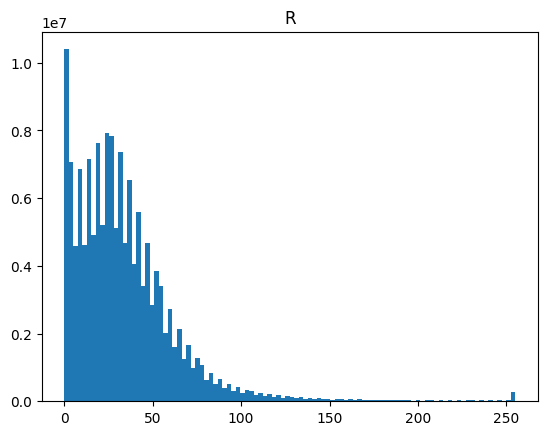

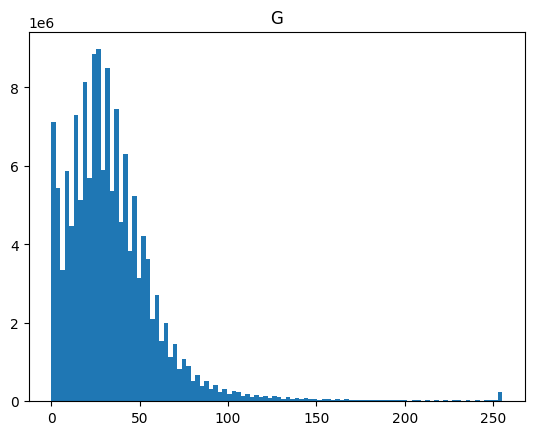

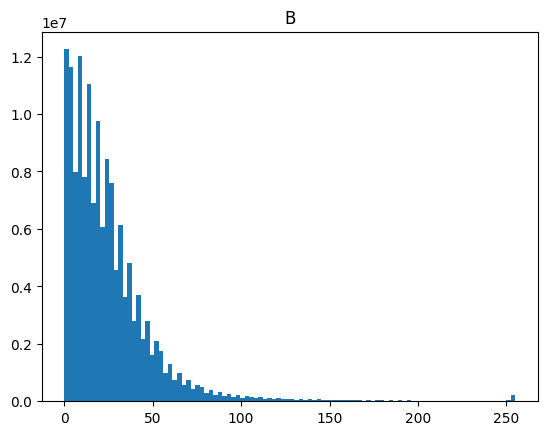

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)

for i, c in enumerate(['R','G','B']):
    plt.hist(pixels[:,i], bins=100)
    plt.title(c)
    plt.show()


In [ ]:
img = img.float()  # convert to float32
img = img / 255.0  # optional normalization to [0,1]


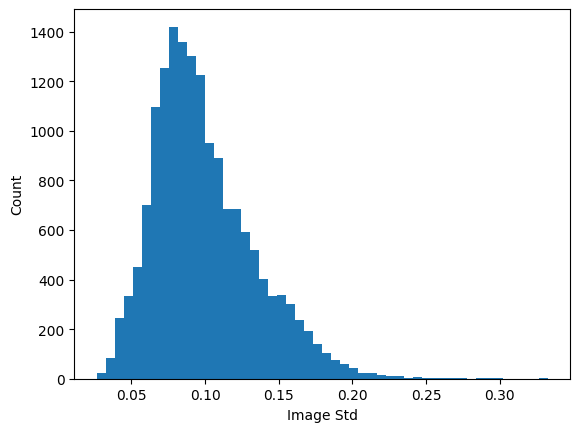

In [ ]:
variances = [img.float().std()/255 for img in images]

plt.hist(variances, bins=50)
plt.xlabel("Image Std")
plt.ylabel("Count")
plt.show()


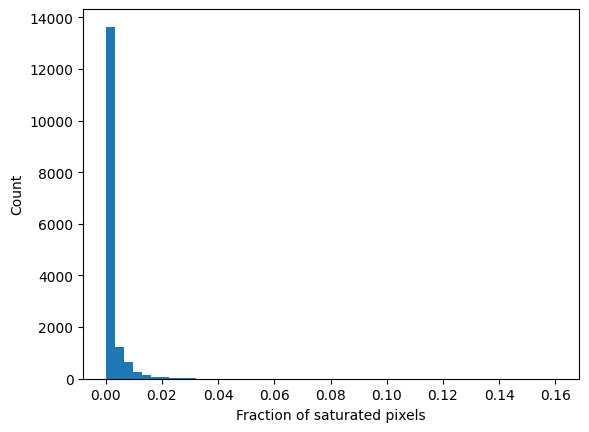

In [ ]:
sat_frac = [(img.float()/255.0 > 0.98).float().mean() for img in images]

plt.hist(sat_frac, bins=50)
plt.xlabel("Fraction of saturated pixels")
plt.ylabel("Count")
plt.show()


In [ ]:
images=torch.load("drive/MyDrive/satellite_images_project/images.pt")
images=images.float()/255.0
images_test=images_test.float()/255.0

In [ ]:
import numpy as np
#cloud filtering

def is_cloudy_v2(img, thresh=0.02):
    # img shape: (H, W, C)
    bright_pixels = (img.mean(dim=-1) > 0.95)  # mean across channels
    fraction = bright_pixels.float().mean()
    return fraction > thresh

mask = torch.tensor([not is_cloudy_v2(img) for img in images])  # True = keep
clean_images = images[mask]
removed_indices = (~mask).nonzero(as_tuple=True)[0]
"""
# Save indices
with open("missing.txt", "a") as f:
    for idx in removed_indices.tolist():
        f.write(f"{idx}\n")"""


'\n# Save indices\nwith open("missing.txt", "a") as f:\n    for idx in removed_indices.tolist():\n        f.write(f"{idx}\n")'

In [ ]:
images.max(),images.min()

(tensor(1.), tensor(0.))

In [ ]:
""""
Global Per-Band Normalization

"""
mean = clean_images.mean(dim=(0, 1, 2))
std  = clean_images.std(dim=(0, 1, 2))

clean_images = clean_images.float()
clean_images = (clean_images - mean) / std


In [ ]:
len(clean_images),len(images),img.shape

(15984, 16149, torch.Size([96, 96, 3]))

In [ ]:
print("min:", clean_images.min().item())
print("max:", clean_images.max().item())
print("mean:", clean_images.mean(dim=(0,1,2)))
print("std:",  clean_images.std(dim=(0,1,2)))


min: -1.2418224811553955
max: 8.685598373413086
mean: tensor([ 7.2552e-08,  7.1703e-08, -1.6547e-08])
std: tensor([1.0000, 1.0000, 1.0000])


#preprocessing of tabular data

In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/satellite_images_project/final_data.csv')
df_test=pd.read_csv('/content/drive/MyDrive/satellite_images_project/test_data_final.csv')

In [ ]:
df=merged_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   system:index                 16209 non-null  object 
 1   Elevation                    16209 non-null  float64
 2   NDBI                         16209 non-null  float64
 3   NDVI                         16209 non-null  float64
 4   NDWI                         16209 non-null  float64
 5   Slope                        16209 non-null  float64
 6   bathrooms                    16209 non-null  float64
 7   bedrooms                     16209 non-null  int64  
 8   condition                    16209 non-null  int64  
 9   date                         16209 non-null  object 
 10  dist_water                   16209 non-null  float64
 11  floors                       16209 non-null  float64
 12  grade                        16209 non-null  int64  
 13  id              

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_drop = ['system:index', 'id', '.geo', 'date','geometry']  # if date is not useful
df.drop(columns=cols_to_drop, inplace=True)

all_cols = df.select_dtypes(include=['float64', 'int64']).columns
binary_cols = ['waterfront', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
ordinal_cols = ['grade', 'condition', 'view', 'bedrooms', 'floors']

exclude = ['price'] + binary_cols + ordinal_cols
scale_cols = [c for c in all_cols if c not in exclude]

scaler = StandardScaler()

# Create the scaled feature matrix
scaled_features = scaler.fit_transform(df[scale_cols])

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [ ]:
#for test data
df_test.drop(columns=cols_to_drop, inplace=True)
df_test[scale_cols] = scaler.transform(df_test[scale_cols])


In [ ]:
# Should be ~0 mean
print(df[scale_cols].mean().abs().max(), df[scale_cols].std().sub(1).abs().max())
df_test[scale_cols].mean().head()


3.518126830844753e-14 3.084848772494375e-05


Elevation   -0.005378
NDBI        -0.014145
NDVI         0.003781
NDWI         0.004441
Slope       -0.004422
dtype: float64

In [ ]:
save_path = "/content/drive/MyDrive/satellite_images_project/final_data.csv"
df.to_csv(save_path, index=False)
save_path = "/content/drive/MyDrive/satellite_images_project/test_data_final.csv"
df_test.to_csv(save_path, index=False)


#Training for xg boost in fusion model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/satellite_images_project/final_data.csv')

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/satellite_images_project/test_data_final.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_tabular = df.drop('price', axis=1)
y = df['price']

X_train, X_temp, y_train, y_temp = train_test_split(X_tabular, y, test_size=0.2, random_state=42)

X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)


y_train_log=np.log1p(y_train)
y_val_log=np.log1p(y_val)
y_test_log=np.log1p(y_test)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train_log)
dval   = xgb.DMatrix(X_val,   label=y_val_log)
dtest  = xgb.DMatrix(X_test,  label=y_test_log)


params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}


evals = [(dtrain, "train"), (dval, "val")]

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=True
)

# predict log-output for train & test
xgb_train_pred_log = xgb_model.predict(dtrain).reshape(-1, 1)
xgb_val_pred_log   = xgb_model.predict(dval).reshape(-1, 1)
xgb_test_pred_log  = xgb_model.predict(dtest).reshape(-1, 1)

# back in original scale
xgb_train_pred = np.expm1(xgb_train_pred_log)
xgb_val_pred   = np.expm1(xgb_val_pred_log)
xgb_test_pred  = np.expm1(xgb_test_pred_log)


print("Best iteration:", xgb_model.best_iteration)


[0]	train-rmse:0.50331	val-rmse:0.49570
[1]	train-rmse:0.48340	val-rmse:0.47609
[2]	train-rmse:0.46467	val-rmse:0.45791
[3]	train-rmse:0.44706	val-rmse:0.44063
[4]	train-rmse:0.43020	val-rmse:0.42405
[5]	train-rmse:0.41402	val-rmse:0.40783
[6]	train-rmse:0.39898	val-rmse:0.39294
[7]	train-rmse:0.38489	val-rmse:0.37881
[8]	train-rmse:0.37166	val-rmse:0.36573
[9]	train-rmse:0.35894	val-rmse:0.35275
[10]	train-rmse:0.34694	val-rmse:0.34093
[11]	train-rmse:0.33555	val-rmse:0.32971
[12]	train-rmse:0.32468	val-rmse:0.31914
[13]	train-rmse:0.31476	val-rmse:0.30990
[14]	train-rmse:0.30517	val-rmse:0.30059
[15]	train-rmse:0.29618	val-rmse:0.29185
[16]	train-rmse:0.28760	val-rmse:0.28331
[17]	train-rmse:0.27961	val-rmse:0.27566
[18]	train-rmse:0.27223	val-rmse:0.26853
[19]	train-rmse:0.26499	val-rmse:0.26171
[20]	train-rmse:0.25806	val-rmse:0.25520
[21]	train-rmse:0.25161	val-rmse:0.24903
[22]	train-rmse:0.24573	val-rmse:0.24333
[23]	train-rmse:0.24018	val-rmse:0.23836
[24]	train-rmse:0.23494	va

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse_log = np.sqrt(mean_squared_error(y_train_log, xgb_train_pred_log))
val_mse_log   = np.sqrt(mean_squared_error(y_val_log, xgb_val_pred_log))
test_mse_log  = np.sqrt(mean_squared_error(y_test_log, xgb_test_pred_log))

print("XGB MSE (log space)")
print(f"Train: {train_mse_log:.4f}")
print(f"Val  : {val_mse_log:.4f}")
print(f"Test : {test_mse_log:.4f}")

from sklearn.metrics import r2_score


train_r2 = r2_score(y_train_log, xgb_train_pred_log)
val_r2   = r2_score(y_val_log,   xgb_val_pred_log)
test_r2  = r2_score(y_test_log,  xgb_test_pred_log)

print("R² (log space)")
print(f"Train: {train_r2:.4f}")
print(f"Val  : {val_r2:.4f}")
print(f"Test : {test_r2:.4f}")



XGB MSE (log space)
Train: 0.1075
Val  : 0.1542
Test : 0.1620
R² (log space)
Train: 0.9580
Val  : 0.9110
Test : 0.9050


In [ ]:
param_grid = [
    {"max_depth": 4, "learning_rate": 0.05, "min_child_weight": 1},
    {"max_depth": 6, "learning_rate": 0.05, "min_child_weight": 1},
    {"max_depth": 8, "learning_rate": 0.05, "min_child_weight": 1},

    {"max_depth": 6, "learning_rate": 0.03, "min_child_weight": 1},
    {"max_depth": 6, "learning_rate": 0.10, "min_child_weight": 1},

    {"max_depth": 6, "learning_rate": 0.05, "min_child_weight": 5},
]

base_params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}


best_rmse = float("inf")
best_model = None
best_params = None

evals = [(dtrain, "train"), (dval, "val")]


for params in param_grid:
      full_params = {**base_params, **params}

      model = xgb.train(
              params=full_params,
              dtrain=dtrain,
              num_boost_round=2000,
              evals=evals,
              early_stopping_rounds=50,
              verbose_eval=False
      )

      val_pred = model.predict(dval)
      mse = mean_squared_error(y_val_log, val_pred)
      val_rmse = np.sqrt(mse)

      print(f"{params} → Val RMSE: {val_rmse:.4f} | Best iter: {model.best_iteration}")

      if val_rmse < best_rmse:
          best_rmse = val_rmse
          best_model = model
          best_params = full_params

print("Best params:")
for k, v in best_params.items():
    print(f"{k}: {v}")

print("Best validation RMSE:", best_rmse)


{'max_depth': 4, 'learning_rate': 0.05, 'min_child_weight': 1} → Val RMSE: 0.1549 | Best iter: 742
{'max_depth': 6, 'learning_rate': 0.05, 'min_child_weight': 1} → Val RMSE: 0.1542 | Best iter: 288
{'max_depth': 8, 'learning_rate': 0.05, 'min_child_weight': 1} → Val RMSE: 0.1546 | Best iter: 156
{'max_depth': 6, 'learning_rate': 0.03, 'min_child_weight': 1} → Val RMSE: 0.1539 | Best iter: 619
{'max_depth': 6, 'learning_rate': 0.1, 'min_child_weight': 1} → Val RMSE: 0.1544 | Best iter: 158
{'max_depth': 6, 'learning_rate': 0.05, 'min_child_weight': 5} → Val RMSE: 0.1548 | Best iter: 265
Best params:
objective: reg:squarederror
eval_metric: rmse
subsample: 0.8
colsample_bytree: 0.8
seed: 42
max_depth: 6
learning_rate: 0.03
min_child_weight: 1
Best validation RMSE: 0.15386346607921017


In [ ]:
from sklearn.metrics import r2_score

test_pred = best_model.predict(dtest)

test_rmse = np.sqrt(mean_squared_error(y_test_log, test_pred))
test_r2   = r2_score(y_test_log, test_pred)

print("Final Test RMSE (log):", test_rmse)
print("Final Test R² (log):", test_r2)


Final Test RMSE (log): 0.16025033222005586
Final Test R² (log): 0.9070932255331342


In [ ]:
xgb_train_feat = best_model.predict(dtrain).reshape(-1, 1)
xgb_val_feat   = best_model.predict(dval).reshape(-1, 1)
xgb_test_feat  = best_model.predict(dtest).reshape(-1, 1)


In [ ]:
dtest_final  = xgb.DMatrix(df_test.drop(['predicted_price','has_image'],axis=1))

xgb_preds_feat= best_model.predict(dtest_final).reshape(-1, 1)

#cnn embeddings

In [ ]:
from torchvision import models
import torch
import torch.nn as nn


device = "cuda" if torch.cuda.is_available() else "cpu"

# Pretrained ResNet18
cnn = models.resnet18(pretrained=True)

# Remove final fc layer → embeddings
cnn_emb_dim = cnn.fc.in_features
cnn.fc = nn.Identity()

cnn = cnn.to(device)
cnn.eval()  # evaluation mode

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
images=torch.load('/content/drive/MyDrive/satellite_images_project/images.pt')
images_test=torch.load('/content/drive/MyDrive/satellite_images_project/images_test.pt')

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Images: [N,H,W,C], uint8
images_tensor = images.permute(0,3,1,2)

# ImageNet normalization
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)
images_tensor = (images_tensor - mean) / std

loader = DataLoader(TensorDataset(images_tensor), batch_size=16, shuffle=False)

all_embeddings = []

with torch.no_grad():
    for batch in tqdm(loader, desc="Computing CNN embeddings"):
        imgs = batch[0].to(device)
        emb = cnn(imgs)  # output [batch, cnn_emb_dim]
        all_embeddings.append(emb.cpu())

cnn_embeddings = torch.cat(all_embeddings, dim=0)
print("CNN embeddings shape:", cnn_embeddings.shape)
print("Min/max/mean of embeddings:", cnn_embeddings.min(), cnn_embeddings.max(), cnn_embeddings.mean())


Computing CNN embeddings: 100%|██████████| 1014/1014 [06:10<00:00,  2.74it/s]


CNN embeddings shape: torch.Size([16209, 512])
Min/max/mean of embeddings: tensor(0.) tensor(769.1556) tensor(19.3490)


In [ ]:
cnn_embeddings[missing] = 0.0
cnn_embeddings[missing[0]].shape

torch.Size([512])

In [ ]:
# Images: [N,H,W,C], uint8
images_tensor_test = images_test.permute(0,3,1,2)

# ImageNet normalization
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)
images_tensor_test = (images_tensor_test - mean) / std

loader = DataLoader(TensorDataset(images_tensor_test), batch_size=16, shuffle=False)

all_embeddings = []

with torch.no_grad():
    for batch in tqdm(loader, desc="Computing CNN embeddings"):
        imgs = batch[0].to(device)
        emb = cnn(imgs)  # output [batch, cnn_emb_dim]
        all_embeddings.append(emb.cpu())

cnn_embeddings_test = torch.cat(all_embeddings, dim=0)
cnn_embeddings_test[missing_test] = 0.0

print("CNN embeddings shape:", cnn_embeddings_test.shape)
print("Min/max/mean of embeddings:", cnn_embeddings_test.min(), cnn_embeddings_test.max(), cnn_embeddings_test.mean())


Computing CNN embeddings: 100%|██████████| 338/338 [01:41<00:00,  3.33it/s]

CNN embeddings shape: torch.Size([5404, 512])
Min/max/mean of embeddings: tensor(0.) tensor(665.3785) tensor(19.3273)


In [ ]:
# Initialize column explicitly
df['has_image'] = 1

df.loc[missing, 'has_image'] = 0

df_test['has_image']=1
df_test.loc[missing_test,'has_image']=0

In [ ]:
torch.save(cnn_embeddings,"/content/drive/MyDrive/satellite_images_project/cnn_embeddings.pt")


#XGboost + CNN multiregression

In [ ]:
import torch
from torch.utils.data import Dataset

class MultimodalDataset(Dataset):
    def __init__(self, cnn_emb, xgb_preds, targets, has_image):
        """
        cnn_emb: [N,D] tensor of CNN embeddings
        xgb_preds: [N,1] tensor of XGB predictions
        targets: [N,] tensor of target prices
        """
        # Convert everything to float32 and detach to avoid warnings
        self.cnn_emb = cnn_emb.detach().clone().float()
        self.xgb_preds = xgb_preds.detach().clone().float()
        self.targets = targets.detach().clone().float()
        self.has_image=has_image.detach().clone().float()


    def __len__(self):
        return self.targets.shape[0]

    def __getitem__(self, idx):
        return self.cnn_emb[idx], self.xgb_preds[idx], self.targets[idx],self.has_image[idx]



In [ ]:
import torch
import torch.nn as nn

class MultimodalRegressor(nn.Module):
    def __init__(self,cnn_dim, xgb_dim=1,hidden_dim=128, dropout=0.3):
        super().__init__()

        # Project CNN features
        self.cnn_proj = nn.Sequential(
            nn.Linear(cnn_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # Project XGB features
        self.xgb_proj = nn.Sequential(
            nn.Linear(xgb_dim, hidden_dim // 2),
            nn.LayerNorm(hidden_dim // 2),
            nn.ReLU()
        )

        fusion_dim = hidden_dim + hidden_dim // 2

        self.image_gate = nn.Sequential(
            nn.Linear(1, hidden_dim),
            nn.Sigmoid()
        )


        # Fusion head
        self.head = nn.Sequential(
            nn.Linear(fusion_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),

            nn.Linear(hidden_dim // 2, 1)

        )

    def forward(self, cnn_feat, xgb_feat,has_image):
        cnn_feat = cnn_feat.view(cnn_feat.size(0), -1)
        xgb_feat = xgb_feat.view(xgb_feat.size(0), -1)
        has_image = has_image.view(has_image.size(0), 1)


        cnn_feat = self.cnn_proj(cnn_feat)
        gate = self.image_gate(has_image)  # [B, hidden_dim]
        cnn_feat = cnn_feat * gate

        xgb_feat = self.xgb_proj(xgb_feat)


        cnn_feat = cnn_feat.view(cnn_feat.size(0), -1)
        xgb_feat = xgb_feat.view(xgb_feat.size(0), -1)


        fused = torch.cat([cnn_feat, xgb_feat], dim=1)
        out = self.head(fused)        # [B, 1]
        return out.squeeze(1)         # [B]


In [ ]:
# Number of samples
N = cnn_embeddings.shape[0]

# Create an array of indices
indices = np.arange(N)

# Split indices the same way as your tabular data
train_idx, temp_idx = train_test_split(indices, test_size=0.2, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42)


cnn_train_emb = cnn_embeddings[train_idx]  # [N_train, D]
cnn_val_emb   = cnn_embeddings[val_idx]    # [N_val, D]
cnn_test_emb  = cnn_embeddings[test_idx]   # [N_test, D]

# train_idx and test_idx are positional indices from train_test_split
y_train = np.log1p(y.iloc[train_idx].values)
y_val   = np.log1p(y.iloc[val_idx].values)
y_test  = np.log1p(y.iloc[test_idx].values)

xgb_train_feat=torch.tensor(xgb_train_feat,dtype=torch.float32)
xgb_test_feat=torch.tensor(xgb_test_feat,dtype=torch.float32)
xgb_val_feat=torch.tensor(xgb_val_feat,dtype=torch.float32)

xgb_mean = xgb_train_feat.mean()
xgb_std  = xgb_train_feat.std()
xgb_train_feat = (xgb_train_feat - xgb_mean) / xgb_std
xgb_val_feat   = (xgb_val_feat - xgb_mean) / xgb_std
xgb_test_feat  = (xgb_test_feat - xgb_mean) / xgb_std

cnn_train_emb = cnn_train_emb.detach().clone()
cnn_val_emb   = cnn_val_emb.detach().clone()
cnn_test_emb  = cnn_test_emb.detach().clone()

y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

has_image = torch.tensor(df['has_image'],dtype=torch.float32).unsqueeze(1)  # [B, 1]




In [ ]:
has_image_train=has_image[train_idx]
has_image_val=has_image[val_idx]
has_image_test=has_image[test_idx]

In [ ]:
print("CNN embedding stats:", cnn_train_emb.mean(), cnn_train_emb.std())
print("XGB feature stats:", xgb_train_feat.mean(), xgb_train_feat.std())
print("y stats:", y_train.min(), y_train.max())


CNN embedding stats: tensor(19.3521) tensor(36.1995)
XGB feature stats: tensor(-2.9830e-07) tensor(1.0000)
y stats: tensor(11.2253) tensor(15.7703)


In [ ]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for cnn, xgb, y, has_image in loader:
            cnn = cnn.to(device)
            xgb = xgb.to(device)
            y = y.to(device)
            has_image = has_image.to(device).float().unsqueeze(1)

            preds = model(cnn, xgb, has_image)
            loss = criterion(preds, y)
            total_loss += loss.item() * cnn.size(0)

    return total_loss / len(loader.dataset)


In [ ]:
from torch.utils.data import DataLoader
import torch

# Example: cnn_train_emb: [N,D], xgb_train_feat: [N,1], y_train: [N]

dataset = MultimodalDataset(cnn_train_emb, xgb_train_feat, y_train, has_image_train)
loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

val_dataset = MultimodalDataset(cnn_val_emb, xgb_val_feat, y_val,has_image_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


device = "cuda" if torch.cuda.is_available() else "cpu"
model = MultimodalRegressor(cnn_dim=cnn_train_emb.shape[1]).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,mode="min", factor=0.5, patience=3,        # wait 3 epochs with no improvement
    min_lr=1e-6)

criterion = nn.MSELoss()

#early stopping
best_val = float("inf")
patience = 5
counter = 0

for epoch in range(30):
    model.train()
    total_loss = 0

    for cnn_batch, xgb_batch, targets, has_image_batch in loader:
        cnn_batch = cnn_batch.to(device)
        xgb_batch = xgb_batch.to(device)
        targets = targets.to(device)
        has_image_batch=has_image_batch.to(device)

        optimizer.zero_grad()
        preds = model(cnn_batch, xgb_batch,has_image_batch)
        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * cnn_batch.size(0)



    avg_loss = total_loss / len(dataset)

    val_loss = evaluate(model, val_loader)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1} | Train MSE: {avg_loss:.4f} | Val MSE: {val_loss:.4f}")


    if val_loss < best_val:
      best_val = val_loss
      counter = 0
      torch.save(model.state_dict(), "best_model.pt")
    else:
      counter += 1

    if counter >= patience:
        print("Early stopping")
        break



Epoch 1 | Train MSE: 33.4401 | Val MSE: 0.1741
Epoch 2 | Train MSE: 1.8390 | Val MSE: 0.0540
Epoch 3 | Train MSE: 1.6145 | Val MSE: 0.0361
Epoch 4 | Train MSE: 1.4391 | Val MSE: 0.0388
Epoch 5 | Train MSE: 1.3568 | Val MSE: 0.0521
Epoch 6 | Train MSE: 1.2845 | Val MSE: 0.0676
Epoch 7 | Train MSE: 1.2207 | Val MSE: 0.0616
Epoch 8 | Train MSE: 1.1836 | Val MSE: 0.0552
Early stopping


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import torch

model.eval()
with torch.no_grad():
    cnn_batch = cnn_val_emb.to(device)
    xgb_batch = xgb_val_feat.to(device)
    has_image_batch=has_image_val.to(device)
    preds = model(cnn_batch, xgb_batch,has_image=has_image_batch)  # y


y_true = y_val.cpu().numpy()
y_pred = preds.cpu().numpy()

# R^2 score
r2 = r2_score(y_true, y_pred)

# RMSE
rmse =  np.sqrt(mean_squared_error(
    (y_true), (y_pred)))

print(f"R2 score: {r2:.4f}, RMSE: {rmse:.2f}")


R2 score: 0.9020, RMSE: 0.16


In [ ]:
def train_one_run(config):
    model = MultimodalRegressor(
        cnn_dim=cnn_train_emb.shape[1],
        hidden_dim=config["hidden_dim"],
        dropout=config["dropout"]
    ).to(device)

    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=config["lr"],
        weight_decay=config["weight_decay"]
    )

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", patience=3, factor=0.5
    )

    best_val = float("inf")
    patience, counter = 5, 0

    for epoch in range(50):
        model.train()
        for cnn, xgb, y, has_image in loader:
            cnn, xgb, y, has_image= cnn.to(device), xgb.to(device), y.to(device), has_image.to(device)

            optimizer.zero_grad()
            loss = criterion(model(cnn, xgb, has_image=has_image), y)
            loss.backward()
            optimizer.step()

        val_loss = evaluate(model, val_loader)
        scheduler.step(val_loss)

        if val_loss < best_val:
            best_val = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break

    return best_val

#RANDOM SEARCH

import random

search_space = {
    "hidden_dim": [64, 128, 256],
    "dropout": [0.1, 0.3, 0.5],
    "lr": [1e-3, 3e-4, 1e-4],
    "weight_decay": [0.0, 1e-4, 1e-3],
}


results = []

for i in range(15):
    config = {k: random.choice(v) for k, v in search_space.items()}
    val_mse = train_one_run(config)

    print(f"Trial {i}: {config} → Val MSE {val_mse:.4f}")
    results.append((val_mse, config))

best = sorted(results, key=lambda x: x[0])[0]
print("Best config:", best)



Trial 0: {'hidden_dim': 256, 'dropout': 0.5, 'lr': 0.0001, 'weight_decay': 0.001} → Val MSE 0.0258
Trial 1: {'hidden_dim': 64, 'dropout': 0.5, 'lr': 0.001, 'weight_decay': 0.0001} → Val MSE 0.0373
Trial 2: {'hidden_dim': 256, 'dropout': 0.5, 'lr': 0.0001, 'weight_decay': 0.0} → Val MSE 0.0274
Trial 3: {'hidden_dim': 128, 'dropout': 0.3, 'lr': 0.0001, 'weight_decay': 0.0001} → Val MSE 0.0256
Trial 4: {'hidden_dim': 128, 'dropout': 0.3, 'lr': 0.0001, 'weight_decay': 0.0001} → Val MSE 0.0264
Trial 5: {'hidden_dim': 64, 'dropout': 0.5, 'lr': 0.0001, 'weight_decay': 0.0001} → Val MSE 0.2086
Trial 6: {'hidden_dim': 64, 'dropout': 0.1, 'lr': 0.001, 'weight_decay': 0.001} → Val MSE 0.0262
Trial 7: {'hidden_dim': 128, 'dropout': 0.3, 'lr': 0.001, 'weight_decay': 0.001} → Val MSE 0.0370
Trial 8: {'hidden_dim': 128, 'dropout': 0.1, 'lr': 0.001, 'weight_decay': 0.0} → Val MSE 0.0262
Trial 9: {'hidden_dim': 64, 'dropout': 0.5, 'lr': 0.0001, 'weight_decay': 0.0001} → Val MSE 0.1105
Trial 10: {'hidde

In [ ]:
from torch.utils.data import DataLoader
import torch

# Example: cnn_train_emb: [N,D], xgb_train_feat: [N,1], y_train: [N]

dataset = MultimodalDataset(cnn_train_emb, xgb_train_feat, y_train, has_image_train)
loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

val_dataset = MultimodalDataset(cnn_val_emb, xgb_val_feat, y_val, has_image_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


device = "cuda" if torch.cuda.is_available() else "cpu"
model = MultimodalRegressor(cnn_dim=cnn_train_emb.shape[1],hidden_dim=128,dropout=0.1).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001,weight_decay=0.0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,mode="min", factor=0.5, patience=3)

criterion = nn.MSELoss()

#early stopping

best_val = float("inf")
patience = 10
counter = 0


for epoch in range(50):
    model.train()
    total_loss = 0

    for cnn_batch, xgb_batch, targets, has_image in loader:
        cnn_batch = cnn_batch.to(device)
        xgb_batch = xgb_batch.to(device)
        targets = targets.to(device)
        has_image= has_image.to(device)

        optimizer.zero_grad()
        preds = model(cnn_batch, xgb_batch,has_image=has_image)
        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * cnn_batch.size(0)



    avg_loss = total_loss / len(dataset)

    val_loss = evaluate(model, val_loader)
    scheduler.step(val_loss)



    if val_loss < best_val:
            best_val = val_loss
            counter = 0
    else:
            counter += 1
    if counter >= patience:
            break

    print(f"Epoch {epoch+1} | Train MSE: {avg_loss:.4f} | Val MSE: {val_loss:.4f}")




Epoch 1 | Train MSE: 75.6719 | Val MSE: 12.1125
Epoch 2 | Train MSE: 2.6870 | Val MSE: 0.2411
Epoch 3 | Train MSE: 0.6186 | Val MSE: 0.0556
Epoch 4 | Train MSE: 0.5182 | Val MSE: 0.0362
Epoch 5 | Train MSE: 0.4918 | Val MSE: 0.0306
Epoch 6 | Train MSE: 0.4637 | Val MSE: 0.0292
Epoch 7 | Train MSE: 0.4321 | Val MSE: 0.0268
Epoch 8 | Train MSE: 0.4232 | Val MSE: 0.0277
Epoch 9 | Train MSE: 0.4089 | Val MSE: 0.0267
Epoch 10 | Train MSE: 0.4002 | Val MSE: 0.0263
Epoch 11 | Train MSE: 0.3968 | Val MSE: 0.0252
Epoch 12 | Train MSE: 0.3924 | Val MSE: 0.0268
Epoch 13 | Train MSE: 0.3893 | Val MSE: 0.0259
Epoch 14 | Train MSE: 0.3804 | Val MSE: 0.0263
Epoch 15 | Train MSE: 0.3755 | Val MSE: 0.0292
Epoch 16 | Train MSE: 0.3566 | Val MSE: 0.0261
Epoch 17 | Train MSE: 0.3541 | Val MSE: 0.0245
Epoch 18 | Train MSE: 0.3577 | Val MSE: 0.0290
Epoch 19 | Train MSE: 0.3544 | Val MSE: 0.0247
Epoch 20 | Train MSE: 0.3467 | Val MSE: 0.0242
Epoch 21 | Train MSE: 0.3503 | Val MSE: 0.0254
Epoch 22 | Train MSE

In [ ]:
model.eval()
with torch.no_grad():
    cnn_batch = cnn_val_emb.to(device)
    xgb_batch = xgb_val_feat.to(device)
    has_image_val=has_image_val.to(device)
    preds = model(cnn_batch, xgb_batch, has_image=has_image_val)  # y

y_true = y_val.cpu().numpy()
y_pred = preds.cpu().numpy()

# R^2 score
r2 = r2_score(y_true, y_pred)

# RMSE
rmse =  np.sqrt(mean_squared_error(
    (y_true), (y_pred)))

print(f"R2 score: {r2:.4f}, RMSE: {rmse:.2f}")


R2 score: 0.9017, RMSE: 0.16


In [ ]:
model.eval()
with torch.no_grad():
    cnn_batch = cnn_val_emb.to(device)
    xgb_batch = xgb_val_feat.to(device)
    has_image_val=has_image_val.to(device)
    preds = model(cnn_batch, xgb_batch, has_image=has_image_val)  # y

y_true = np.expm1(y_val.cpu().numpy() )
y_pred = np.expm1(preds.cpu().numpy())

# R^2 score
r2 = r2_score(y_true, y_pred)

# RMSE
rmse =  np.sqrt(mean_squared_error(
    (y_true), (y_pred)))

print(f"R2 score: {r2:.4f}, RMSE: {rmse:.2f}")


R2 score: 0.8838, RMSE: 116771.82


In [ ]:
model.eval()
with torch.no_grad():
    cnn_batch = cnn_test_emb.to(device)
    xgb_batch = xgb_test_feat.to(device)
    has_image=has_image_test.to(device)
    preds = model(cnn_batch, xgb_batch, has_image=has_image)  # y


y_true = y_test.cpu().numpy()  # [N_test]

y_pred = preds.cpu().numpy()          # [N_test]

# R^2 score
r2 = r2_score(y_true, y_pred)

# RMSE
rmse = mean_squared_error(
    (y_true), (y_pred))

print(f"R2 score: {r2:.4f}, RMSE: {rmse:.2f}")


R2 score: 0.8956, RMSE: 0.03


In [ ]:
#final training

cnn_full = torch.cat([cnn_train_emb, cnn_val_emb])
xgb_full = torch.cat([xgb_train_feat, xgb_val_feat])
y_full   = torch.cat([y_train, y_val])
has_image_full=torch.cat([has_image_train,has_image_val])

from torch.utils.data import random_split

full_dataset = MultimodalDataset(cnn_full, xgb_full, y_full, has_image_full)
val_size = int(0.1 * len(full_dataset))
train_size = len(full_dataset) - val_size
train_ds, mini_val_ds = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
mini_val_loader = DataLoader(mini_val_ds, batch_size=64, shuffle=False)


device = "cuda" if torch.cuda.is_available() else "cpu"
model = MultimodalRegressor(cnn_dim=cnn_full.shape[1],hidden_dim=128,dropout=0.1).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler= torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,mode="min", factor=0.5, patience=3)

criterion = nn.MSELoss()


for epoch in range(30):
    model.train()
    total_loss = 0

    for cnn_batch, xgb_batch, targets, has_image in loader:
        cnn_batch = cnn_batch.to(device)
        xgb_batch = xgb_batch.to(device)
        targets = targets.to(device)
        has_image= has_image.to(device)

        optimizer.zero_grad()
        preds = model(cnn_batch, xgb_batch,has_image)
        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * cnn_batch.size(0)


    avg_loss = total_loss / len(dataset)

    val_loss = evaluate(model, val_loader)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1} | Train MSE: {avg_loss:.4f} | Val MSE: {val_loss:.4f}")




Epoch 1 | Train MSE: 62.5429 | Val MSE: 4.5681
Epoch 2 | Train MSE: 1.2255 | Val MSE: 0.1445
Epoch 3 | Train MSE: 0.5750 | Val MSE: 0.0481
Epoch 4 | Train MSE: 0.5130 | Val MSE: 0.0356
Epoch 5 | Train MSE: 0.4784 | Val MSE: 0.0333
Epoch 6 | Train MSE: 0.4598 | Val MSE: 0.0285
Epoch 7 | Train MSE: 0.4542 | Val MSE: 0.0285
Epoch 8 | Train MSE: 0.4170 | Val MSE: 0.0262
Epoch 9 | Train MSE: 0.4145 | Val MSE: 0.0274
Epoch 10 | Train MSE: 0.4144 | Val MSE: 0.0275
Epoch 11 | Train MSE: 0.3999 | Val MSE: 0.0258
Epoch 12 | Train MSE: 0.3837 | Val MSE: 0.0279
Epoch 13 | Train MSE: 0.3809 | Val MSE: 0.0314
Epoch 14 | Train MSE: 0.3716 | Val MSE: 0.0249
Epoch 15 | Train MSE: 0.3601 | Val MSE: 0.0279
Epoch 16 | Train MSE: 0.3668 | Val MSE: 0.0246
Epoch 17 | Train MSE: 0.3469 | Val MSE: 0.0254
Epoch 18 | Train MSE: 0.3384 | Val MSE: 0.0287
Epoch 19 | Train MSE: 0.3367 | Val MSE: 0.0262
Epoch 20 | Train MSE: 0.3356 | Val MSE: 0.0252
Epoch 21 | Train MSE: 0.3306 | Val MSE: 0.0241
Epoch 22 | Train MSE:

In [ ]:
model.eval()
with torch.no_grad():
    cnn_batch = cnn_test_emb.to(device)
    xgb_batch = xgb_test_feat.to(device)
    has_image=has_image_test.to(device)
    preds = model(cnn_batch, xgb_batch, has_image=has_image)  # y


y_true = y_test.cpu().numpy()  # [N_test]

y_pred = preds.cpu().numpy()          # [N_test]

# R^2 score
r2 = r2_score(y_true, y_pred)

# RMSE
rmse = mean_squared_error(
    (y_true), (y_pred))

print(f"R2 score: {r2:.4f}, RMSE: {rmse:.2f}")


R2 score: 0.8979, RMSE: 0.03


In [ ]:
save_path = "/content/drive/MyDrive/satellite_images_project/best_multimodal_model.pt"

torch.save(model.state_dict(), save_path)

torch.save(cnn.state_dict(),
           "/content/drive/MyDrive/satellite_images_project/cnn_backbone.pt")



In [ ]:
#df_test
xgb_preds_feat=torch.tensor(xgb_preds_feat,dtype=torch.float32)
xgb_preds_feat = (xgb_preds_feat - xgb_mean) / xgb_std

cnn_embeddings_test = torch.tensor(cnn_embeddings_test,dtype=torch.float32)

has_image_df_test=torch.tensor(df_test['has_image'],dtype=torch.float32).unsqueeze(1)  # [B,1]


model.eval()
with torch.no_grad():
    cnn_batch = cnn_embeddings_test.to(device)
    xgb_batch = xgb_preds_feat.to(device)
    has_image=has_image_df_test.to(device)
    preds = model(cnn_batch, xgb_batch, has_image=has_image)  # y



y_pred = preds.cpu().numpy()          # [N_test]


/tmp/ipython-input-3602010624.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cnn_embeddings_test = torch.tensor(cnn_embeddings_test,dtype=torch.float32)


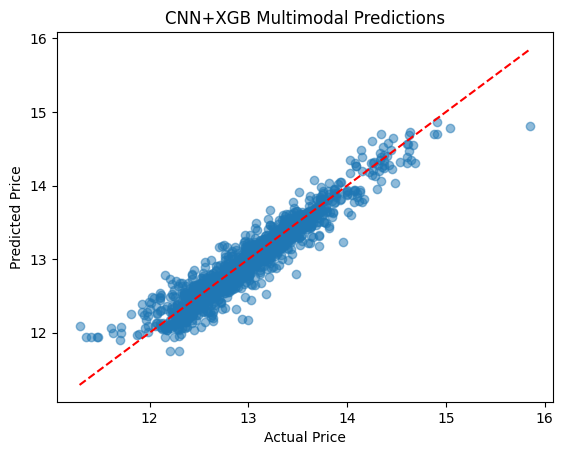

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("CNN+XGB Multimodal Predictions")
plt.show()


In [ ]:
model=torch.load("/content/drive/MyDrive/satellite_images_project/best_multimodal_model.pt")
cnn=torch.load("/content/drive/MyDrive/satellite_images_project/cnn_backbone.pt")

In [ ]:
pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=59510bb7e31416aab69f04fa204ef01f397bba2f29cb251c43fd9ac1afe27aad
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [ ]:
import cv2
import torch

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


In [ ]:
import os
import imageio

img_path = os.path.join('/content/drive/MyDrive/satellite_images_project/images_96','house_0.png')
img = imageio.imread(img_path)


/tmp/ipython-input-4211711259.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [ ]:
import numpy as np
import cv2
import torch

def get_canny_edge(img, threshold1=30, threshold2=80):
    """
    img: torch.Tensor [B,C,H,W], [C,H,W] or numpy array [H,W,3]
    returns: numpy array [H,W,3] in range [0,1]
    """

    # Convert torch to numpy and handle batch dimension if present
    if isinstance(img, torch.Tensor):
        img = img.detach().cpu()

        if img.ndim == 4 and img.shape[0] == 1:
            img = img.squeeze(0) # Now [C,H,W]

        if img.ndim == 4:
            raise ValueError("Batch size > 1 not supported directly by get_canny_edge.")

        # Permute from [C,H,W] to [H,W,C] for OpenCV
        if img.ndim == 3 and img.shape[0] == 3:
            img = img.permute(1, 2, 0) # Now [H,W,C]

        img = img.numpy()

    # De-normalize if ImageNet normalized
    if img.max() <= 1.0 + 1e-6:

        mean = np.array([0.485, 0.456, 0.406])
        std  = np.array([0.229, 0.224, 0.225])

        if img.shape[-1] == 3:
            img = std * img + mean
        img = np.clip(img, 0, 1)

    # Convert to uint8 (expected by OpenCV)
    img = (img * 255).astype(np.uint8)

    # Convert to grayscale

    if img.ndim == 3 and img.shape[-1] == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif img.ndim == 2 or (img.ndim == 3 and img.shape[-1] == 1):
        gray = img.squeeze() if img.ndim == 3 else img # Already grayscale or single channel
    else:
        raise ValueError(f"Unsupported image format for Canny edge detection: {img.shape}")

    # Blur
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny edge detection
    edge = cv2.Canny(gray, threshold1, threshold2)

    # Invert edges and normalize to [0,1] for visualization
    edge = 255 - edge
    edge = np.stack([edge]*3, axis=-1) / 255.0 # Convert back to 3 channels for consistent return type

    return edge


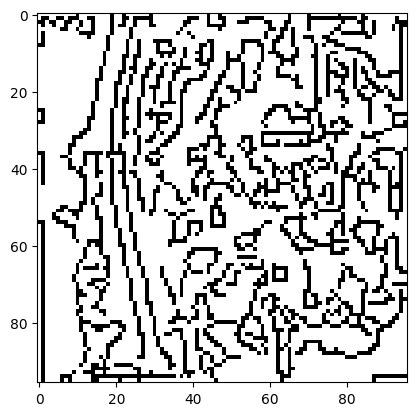

In [ ]:
edge_img=get_canny_edge(img)
plt.imshow(edge_img)
plt.show()

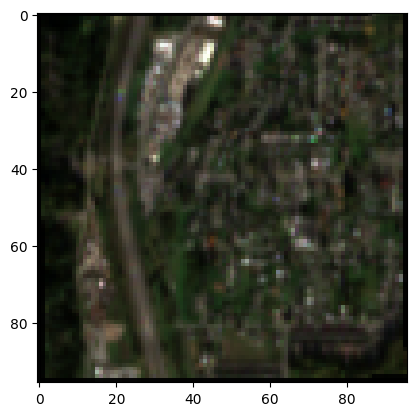

In [ ]:
plt.imshow(img)
plt.show()


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = cnn.to(device)

state_dict=torch.load("/content/drive/MyDrive/satellite_images_project/cnn_backbone.pt")

model.load_state_dict(state_dict)

model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
cnn=model

In [ ]:
class RegressionTarget:
    def __init__(self, index=0):
        self.index = index

    def __call__(self, model_output):
        if model_output.ndim == 1:
            return model_output[0]
        elif model_output.ndim == 2:
            return model_output[0, self.index]
        else:
            raise ValueError(f"Unexpected output shape: {model_output.shape}")


In [ ]:
import torch
import numpy as np

# img: numpy array [H, W, 3], RGB
assert isinstance(img, np.ndarray)

# Convert to float32
img_np = img.astype(np.float32)

# Scale to [0,1] if needed
if img_np.max() > 1.0:
    img_np /= 255.0

# HWC → CHW
img_tensor = torch.from_numpy(img_np).permute(2, 0, 1)

#  ImageNet normalization (for ResNet)
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std  = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

img_tensor = (img_tensor - mean) / std

input_tensor = img_tensor.unsqueeze(0)   # [1, 3, H, W]


In [ ]:
import torch
from pytorch_grad_cam import GradCAM

cnn.eval()

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = cnn.to(device)

target_layers = [cnn.layer4[-1]]

cam_extractor = GradCAM(
    model=cnn,
    target_layers=target_layers
)

input_tensor = input_tensor.to(device)

# Regression target
targets = [RegressionTarget()]

grayscale_cam = cam_extractor(
    input_tensor=input_tensor,
    targets=targets
)  # shape: [1, H, W]



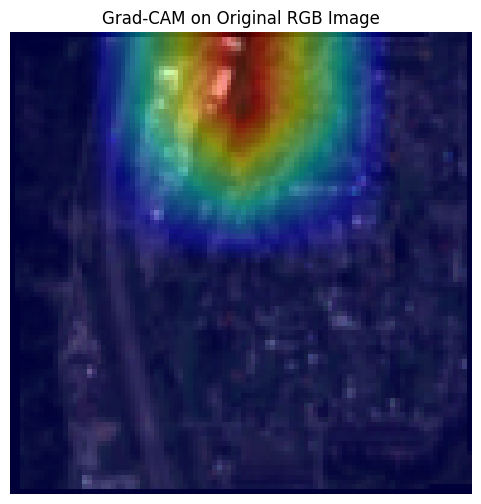

In [ ]:
cam = grayscale_cam[0]   # [H,W]

plt.figure(figsize=(6,6))
plt.imshow(img_np)
plt.imshow(cam, cmap="jet", alpha=0.45)
plt.axis("off")
plt.title("Grad-CAM on Original RGB Image")
plt.show()


array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [18, 27, 14],
        [23, 29, 14],
        [ 1,  2,  1]],

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [17, 23, 13],
        [25, 28, 16],
        [ 2,  2,  1]],

       [[ 0,  0,  0],
        [ 3,  6,  2],
        [ 3,  4,  1],
        ...,
        [30, 35, 20],
        [37, 39, 22],
        [ 2,  2,  1]],

       ...,

       [[ 0,  0,  0],
        [ 2,  4,  2],
        [21, 31, 14],
        ...,
        [26, 30, 14],
        [26, 32, 10],
        [32, 37, 13]],

       [[ 0,  0,  0],
        [ 3,  4,  2],
        [24, 32, 15],
        ...,
        [ 3,  4,  2],
        [ 3,  4,  1],
        [ 4,  5,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  2,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
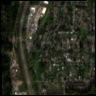

In [ ]:
img

Found 50 images


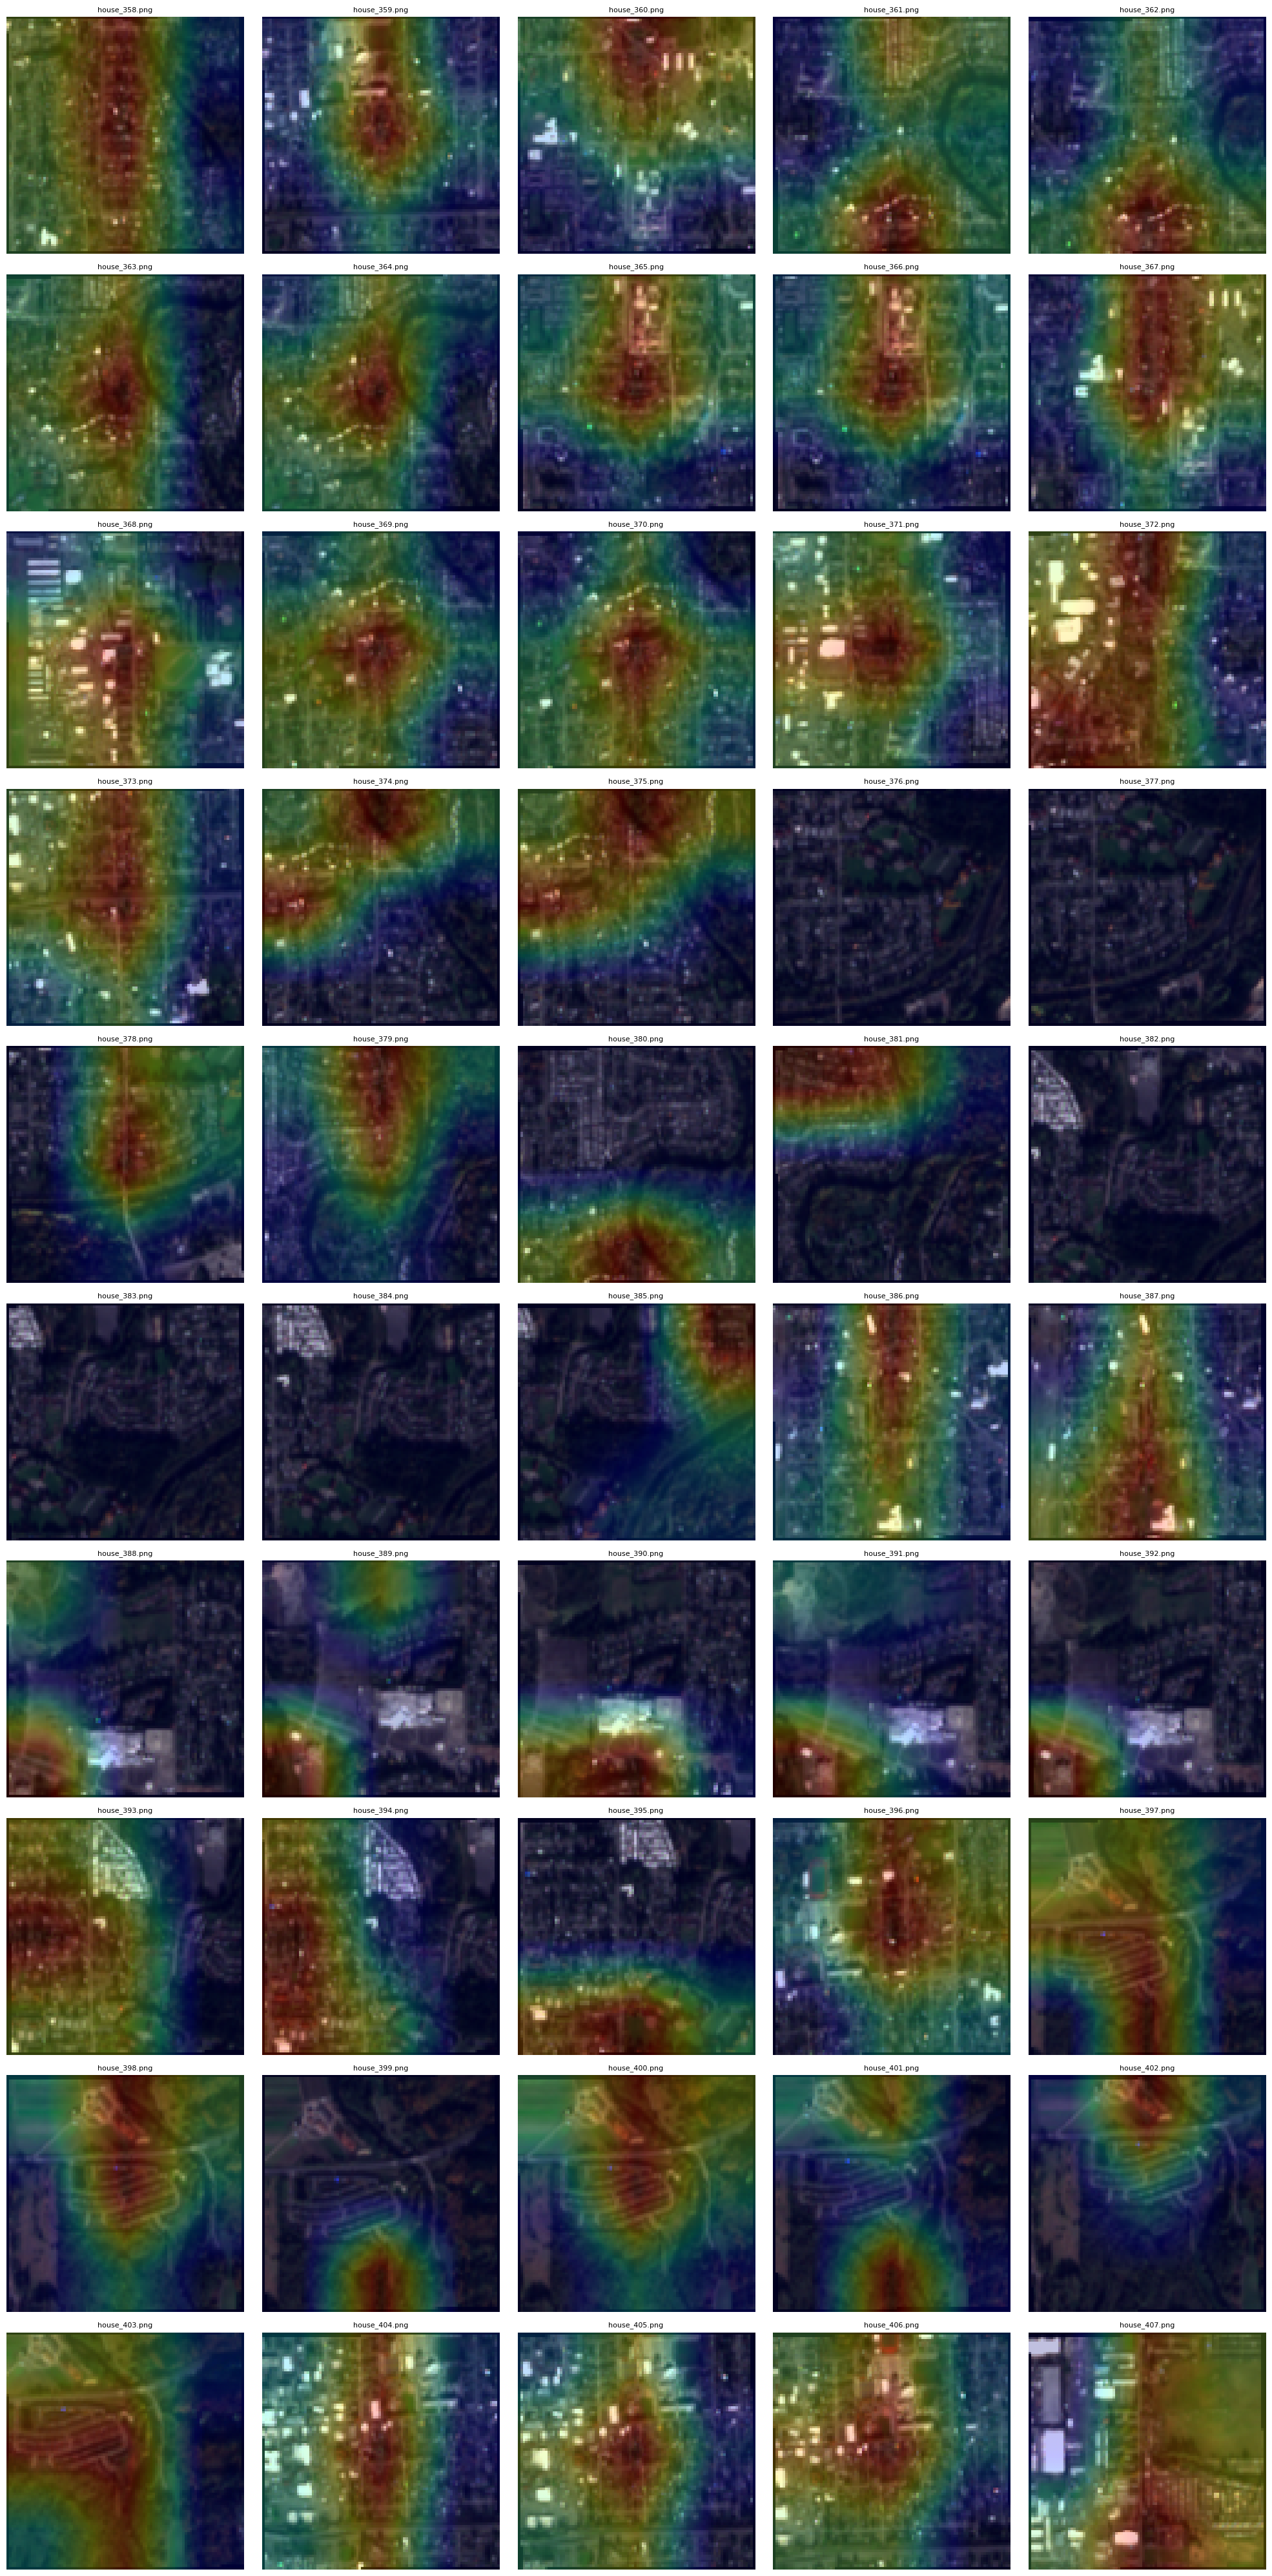

In [ ]:
def img_prep(img, device):
    img_np = img.astype(np.float32)

    if img_np.max() > 1.0:
        img_np /= 255.0

    img_tensor = torch.from_numpy(img_np).permute(2, 0, 1).to(device)

    mean = torch.tensor([0.485, 0.456, 0.406], device=device).view(3,1,1)
    std  = torch.tensor([0.229, 0.224, 0.225], device=device).view(3,1,1)

    img_tensor = (img_tensor - mean) / std

    return img_tensor.unsqueeze(0), img_np  # tensor + vis image


img_dir = "/content/drive/MyDrive/satellite_images_project/images_96"



img_paths = [
    os.path.join(img_dir, f)
    for f in os.listdir(img_dir)
    if f.lower().endswith(".png")][:50]

print(f"Found {len(img_paths)} images")

import matplotlib.pyplot as plt

def show_gradcams(img_paths, cam_extractor, cnn, device, n_cols=10, alpha=0.25):
    """
    img_paths: list of image paths
    cam_extractor: GradCAM object
    cnn: model
    device: torch device
    n_cols: number of images per row
    alpha: transparency for CAM overlay (lower -> more background visible)
    """

    cnn.eval()
    targets = [RegressionTarget()]

    n_images = len(img_paths)
    n_rows = (n_images + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 4, n_rows * 4))

    for idx, img_path in enumerate(img_paths):
        # Load image
        img = imageio.v2.imread(img_path)
        input_tensor, img_np = img_prep(img, device)

        # Compute Grad-CAM
        grayscale_cam = cam_extractor(input_tensor=input_tensor, targets=targets)
        cam = grayscale_cam[0]

        # Plot
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.imshow(img_np)
        plt.imshow(cam, cmap="jet", alpha=alpha)  # make CAM more transparent
        plt.axis("off")
        plt.title(os.path.basename(img_path), fontsize=8)

    plt.tight_layout()
    plt.show()


show_gradcams(img_paths[:50], cam_extractor, cnn, device, n_cols=5, alpha=0.25)



In [ ]:
df_test['predicted_price']=np.expm1(y_pred)

In [ ]:
save_path = "/content/drive/MyDrive/satellite_images_project/test_data_final.csv"
df_test.to_csv(save_path, index=False)


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/satellite_images_project/test_data_final.csv')
image_df=pd.read_csv('/content/drive/MyDrive/satellite_images_project/seattle_housing_features_test.csv')

In [ ]:
price=df_test['predicted_price']
id=image_df['id']


# Combine into DataFrame
df_out = pd.DataFrame({'id': id,'predicted_price': price});

print(df_out.head())


output_path = "/content/drive/MyDrive/satellite_images_project/24112111.csv"

df_out.to_csv(output_path, index=False)

print(f"Saved CSV to: {output_path}")



           id  predicted_price
0  7849202190        3882556.8
1  3374500520        3792042.2
2  6306400140        3777597.2
3  7987400316        3770291.0
4  1222029077        3831147.5
Saved CSV to: /content/drive/MyDrive/satellite_images_project/24112111.csv
